In [6]:
import os
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np
import iDISCO_analysis_new as ida
importlib.reload(ida)

import statsmodels.stats 
from statsmodels.stats.multitest import multipletests

from matplotlib.colors import to_rgba

In [7]:
import sys

# Remove the module from cache to ensure a fresh import
if 'iDISCO_analysis_new' in sys.modules:
    del sys.modules['iDISCO_analysis_new']

# Reimport the module
import iDISCO_analysis_new as ida

In [8]:
# define base path
base_path = '/Volumes/lab-kohlj/home/shared/people/Irene/'

#import spreadsheet with data - the last row of the spreadsheet should have "manual" written in the column "name"
#and should basically have the total number of cells in the 255 hemisphere for each animal, and 0 in all other columns
df_base_ret_vs_sens_ret_data = pd.read_csv(base_path + 'iDISCO/Results/baseline_vs_sens_low_n_cells_removed/statistics_baseline_sensitised.csv')

#read the brain function csv that was manually created taking help from ChatGPT:
df_brain_function_base_ret_vs_sens_ret = pd.read_csv(base_path + 'iDISCO/Results/baseline_vs_sens_low_n_cells_removed/brain_function_baseline_vs_sensitised.csv')


In [12]:
#define colors to be used for plotting - change for your case
# col_base_ret = '#d8bfd8'
col_base_ret = 'gray'
col_sens_ret = '#a87dc2'

In [9]:
#create a significant dataframe for this comparison by taking rows from hemisphere 255 with p<0.05:
df_base_ret_vs_sens_ret_data_sig = df_base_ret_vs_sens_ret_data.loc[(df_base_ret_vs_sens_ret_data['p_value']<0.05) & (df_base_ret_vs_sens_ret_data['hemisphere']==255)]

In [103]:
df_brain_function_base_ret_vs_sens_ret.name

0               Paraventricular hypothalamic nucleus
1                          Lateral amygdalar nucleus
2           Accessory olfactory bulb, granular layer
3                  Reticular nucleus of the thalamus
4                                   Stria terminalis
5                 Bed nuclei of the stria terminalis
6              Orbital area, lateral part, layer 2/3
7                                        Dorsal limb
8           Central amygdalar nucleus, capsular part
9                       Postpiriform transition area
10    Ventral posterolateral nucleus of the thalamus
11                        Principal mammillary tract
12                Anterior commissure, temporal limb
13                    Posterodorsal preoptic nucleus
14                                 Cerebral peduncle
15                                Fundus of striatum
16                   Primary auditory area, layer 6b
17              Hippocampo-amygdalar transition area
Name: name, dtype: object

In [104]:
print(set(df_brain_function_base_ret_vs_sens_ret.name)-set(df_base_ret_vs_sens_ret_data_sig.name))

{'Dorsal limb', 'Stria terminalis', 'Principal mammillary tract', 'Cerebral peduncle', 'Anterior commissure, temporal limb'}


In [105]:
#Add the function from the brain function csv to the significant dataframe
# df_base_ret_vs_sens_ret_data_sig["function"] = df_brain_function_base_ret_vs_sens_ret["function"].values

In [10]:
# Safer approach using merge
df_base_ret_vs_sens_ret_data_sig = df_base_ret_vs_sens_ret_data_sig.merge(
    df_brain_function_base_ret_vs_sens_ret[['name', 'function']], 
    on='name', 
    how='left'
)

In [11]:
#plot volcano for the comparison, using all the data of hemisphere 255
ida.plot_volcano(df_base_ret_vs_sens_ret_data, df_base_ret_vs_sens_ret_data_sig, "sensitised", "baseline", [col_sens_ret, col_base_ret])

NameError: name 'col_sens_ret' is not defined

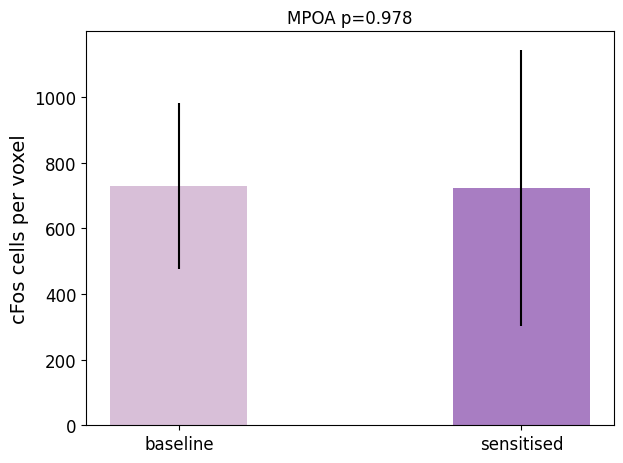

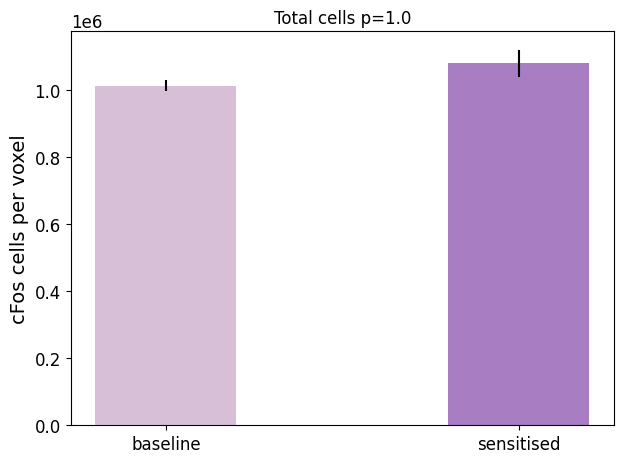

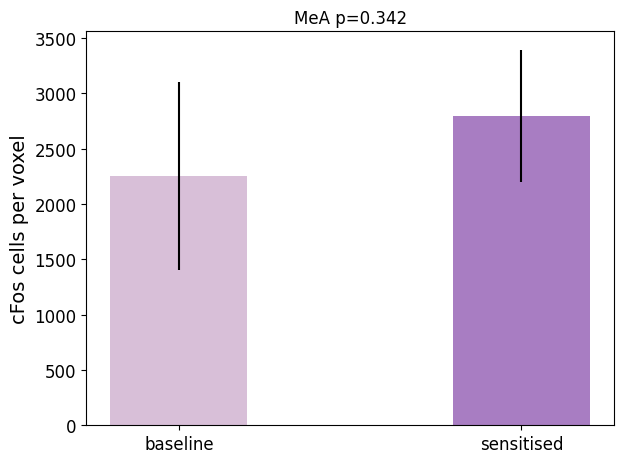

In [108]:
#plot mpoa, mea and total number of cells for the comparison
df_mpoa_base_sens, df_total_base_sens, df_mea_base_sens = ida.plot_brain_region(df_base_ret_vs_sens_ret_data, "baseline", "sensitised",
              "baseline", "sensitised", [col_base_ret, col_sens_ret])

In [13]:
#create a new dataframe for brain regions where either group 1(baseline) or group 2 (retr) had more cfos
df_base_ret_vs_sens_ret_data_sig_base = df_base_ret_vs_sens_ret_data_sig.loc[df_base_ret_vs_sens_ret_data_sig['p_sign']==1] # p_sign is 1 if group 1 has more cfos
df_base_ret_vs_sens_ret_data_sig_sens = df_base_ret_vs_sens_ret_data_sig.loc[df_base_ret_vs_sens_ret_data_sig['p_sign']==-1] # p_sign is -1 if group 2 has more cfos

In [14]:
df_base_ret_vs_sens_ret_data_sig_sens

,Unnamed: 0,id,name,volume,hemisphere,baseline_counts_18,baseline_counts_19,baseline_counts_22,baseline_counts_23,mean_baseline,...,sensitised_counts_05,sensitised_counts_06,sensitised_counts_07,sensitised_counts_08,mean_sensitised,sd_sensitised,p_value,q_value,p_sign,function
9,930,566,Postpiriform transition area,699453125.0,255,2342,2595,2793,1263,2248.25,...,4479,4429,3188,2697,3698.25,895.6232,0.044688,0.774615,-1,"Olfactory processing, transition zone, pirifor..."


In [15]:
# Debug the function column
print("Function column exists:", 'function' in df_base_ret_vs_sens_ret_data_sig_base.columns)
print("Function column type:", df_base_ret_vs_sens_ret_data_sig_base['function'].dtype)
print("NaN values in function column:", df_base_ret_vs_sens_ret_data_sig_base['function'].isna().sum())
print("Sample values:", df_base_ret_vs_sens_ret_data_sig_base['function'].head())

# If needed, fill NaN values
df_base_ret_vs_sens_ret_data_sig_base['function'] = df_base_ret_vs_sens_ret_data_sig_base['function'].fillna('')

Function column exists: True
Function column type: object
NaN values in function column: 5
Sample values: 0    Stress response, hormone release, autonomic, s...
1                      Emotion, fear, learning, memory
2     Pheromone processing, smell, sensory integration
3       Sensory gating, attention, thalamic regulation
4                                                  NaN
Name: function, dtype: object


/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_16754/2305999037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_ret_vs_sens_ret_data_sig_base['function'] = df_base_ret_vs_sens_ret_data_sig_base['function'].fillna('')


Sensory matches: 6
Motor matches: 1
Memory, cognition, decision matches: 4
Motivation, emotion, social behavior matches: 8
Unmatched regions: 5
Unmatched functions:
- stria terminalis: 
- dorsal limb: 
- principal mammillary tract: 
- anterior commissure, temporal limb: 
- cerebal peduncle: 


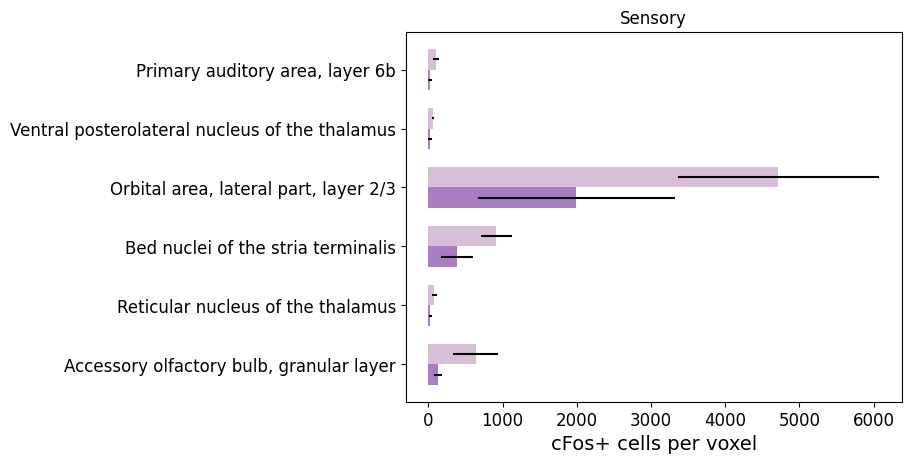

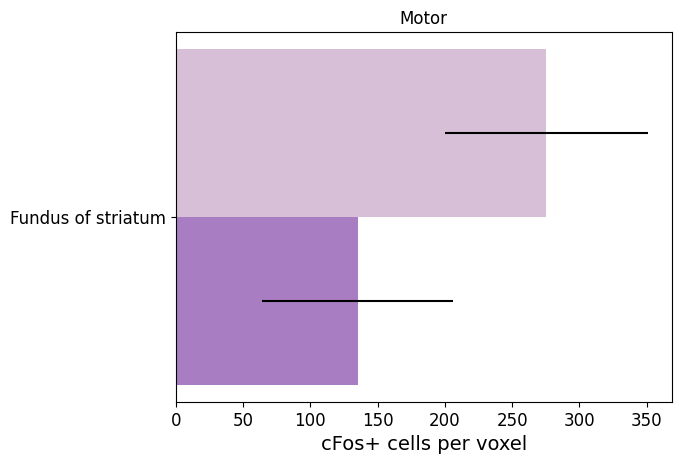

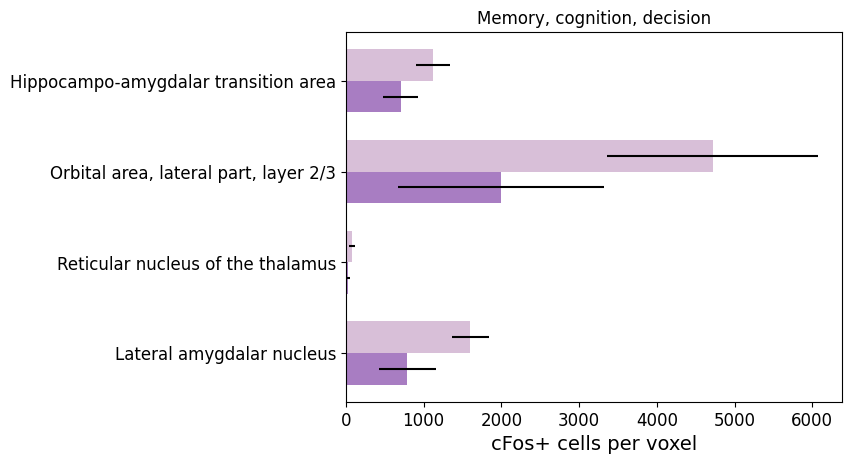

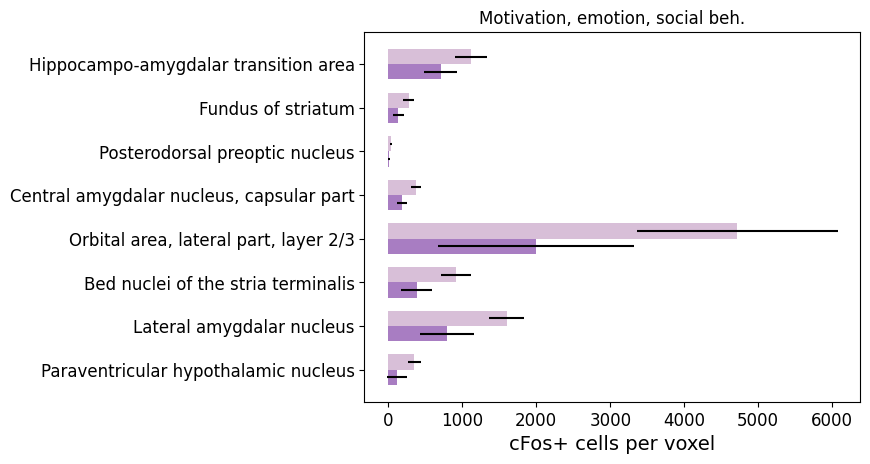

In [112]:
#create dataframes for category sensory, motor, memory/cognition/decision and motivation/emotion/social and plot them
#for brain regions where baseline was higher than retr group
(df_sensory_vir_no_retr_retr, df_motor_vir_no_retr_retr,
 df_mem_cog_dec_vir_no_retr_retr, df_motiv_emo_soc_vir_no_retr_retr,
 df_unmatched_vir_no_retr_retr)  = ida.category_dfs(df_base_ret_vs_sens_ret_data_sig_base,
                                "baseline_retrieving_vs_sensitised_retrieving", "baseline", "sensitised", 
                                [col_base_ret, col_sens_ret], [1,1])

In [142]:
# get a list of all the brain areas in the dataframe that correspond to hemisphere 255
# Get all unique brain areas from hemisphere 255 
brain_areas = df_base_ret_vs_sens_ret_data.loc[df_base_ret_vs_sens_ret_data['hemisphere'] == 255, 'name'].unique()

# Print as a numbered list
print(f"Brain areas in hemisphere 255 (total: {len(brain_areas)}):")
for i, area in enumerate(sorted(brain_areas), 1):
    print(f"{i}. {area}")

Brain areas in hemisphere 255 (total: 637):
1. Abducens nucleus
2. Accessory facial motor nucleus
3. Accessory olfactory bulb, glomerular layer
4. Accessory olfactory bulb, granular layer
5. Accessory olfactory bulb, mitral layer
6. Accessory supraoptic group
7. Accessory trigeminal nucleus
8. Agranular insular area, dorsal part, layer 1
9. Agranular insular area, dorsal part, layer 2/3
10. Agranular insular area, dorsal part, layer 5
11. Agranular insular area, dorsal part, layer 6a
12. Agranular insular area, dorsal part, layer 6b
13. Agranular insular area, posterior part, layer 1
14. Agranular insular area, posterior part, layer 2/3
15. Agranular insular area, posterior part, layer 5
16. Agranular insular area, posterior part, layer 6a
17. Agranular insular area, posterior part, layer 6b
18. Agranular insular area, ventral part, layer 1
19. Agranular insular area, ventral part, layer 2/3
20. Agranular insular area, ventral part, layer 5
21. Agranular insular area, ventral part, lay

In [113]:
# Add this cell to check uncategorized regions
print("Uncategorized regions:")
for idx, row in df_unmatched_vir_no_retr_retr.iterrows():
    print(f"- {row['name']}: {row['function']}")
    
# Check if there are specific terms we're missing
if len(df_unmatched_vir_no_retr_retr) > 0:
    all_functions = ' '.join(df_unmatched_vir_no_retr_retr['function'].astype(str)).lower()
    key_terms = ['memory', 'cognition', 'decision', 'motor', 'movement', 
                 'emotion', 'motivation', 'social']
    
    print("\nPossible missing terms:")
    for term in key_terms:
        if term in all_functions:
            print(f"- '{term}' appears in uncategorized regions")

Uncategorized regions:
- stria terminalis: 
- dorsal limb: 
- principal mammillary tract: 
- anterior commissure, temporal limb: 
- cerebal peduncle: 

Possible missing terms:


In [146]:
# Define functional groups for benjamini-bogolomov method for multiple testing correction
functional_groups = {
    "olfaction_pheromonal_processing": [
        "Accessory olfactory bulb, glomerular layer",
        "Accessory olfactory bulb, mitral layer",
        "Accessory olfactory bulb, granular layer",
        "Main olfactory bulb",
        "Anterior olfactory nucleus",
        "Nucleus of the lateral olfactory tract, molecular layer",
        "Nucleus of the lateral olfactory tract, pyramidal layer",
        "Nucleus of the lateral olfactory tract, layer 3",
        "Piriform area",
        "Piriform-amygdalar area",
        "Postpiriform transition area",
        "Cortical amygdalar area, anterior part",
        "Cortical amygdalar area, posterior part, lateral zone",
        "Cortical amygdalar area, posterior part, medial zone",
        "Bed nucleus of the accessory olfactory tract",
        "Taenia tecta, dorsal part",
        "Taenia tecta, ventral part",
        "Olfactory tubercle",
        "Anterior amygdalar area",
        "Posterior amygdalar nucleus"
    ],

    "tactile_sensory_information": [
        # Primary somatosensory cortex
        "Primary somatosensory area, barrel field, layer 1",
        "Primary somatosensory area, barrel field, layer 2/3",
        "Primary somatosensory area, barrel field, layer 4",
        "Primary somatosensory area, barrel field, layer 5",
        "Primary somatosensory area, barrel field, layer 6a",
        "Primary somatosensory area, barrel field, layer 6b",
        "Primary somatosensory area, nose, layer 1",
        "Primary somatosensory area, nose, layer 2/3",
        "Primary somatosensory area, nose, layer 4",
        "Primary somatosensory area, nose, layer 5",
        "Primary somatosensory area, nose, layer 6a",
        "Primary somatosensory area, nose, layer 6b",
        "Primary somatosensory area, mouth, layer 1",
        "Primary somatosensory area, mouth, layer 2/3",
        "Primary somatosensory area, mouth, layer 4",
        "Primary somatosensory area, mouth, layer 5",
        "Primary somatosensory area, mouth, layer 6a",
        "Primary somatosensory area, mouth, layer 6b",
        "Primary somatosensory area, trunk, layer 1",
        "Primary somatosensory area, trunk, layer 2/3",
        "Primary somatosensory area, trunk, layer 4",
        "Primary somatosensory area, trunk, layer 5",
        "Primary somatosensory area, trunk, layer 6a",
        "Primary somatosensory area, trunk, layer 6b",
        "Primary somatosensory area, lower limb, layer 1",
        "Primary somatosensory area, lower limb, layer 2/3",
        "Primary somatosensory area, lower limb, layer 4",
        "Primary somatosensory area, lower limb, layer 5",
        "Primary somatosensory area, lower limb, layer 6a",
        "Primary somatosensory area, lower limb, layer 6b",
        "Primary somatosensory area, upper limb, layer 1",
        "Primary somatosensory area, upper limb, layer 2/3",
        "Primary somatosensory area, upper limb, layer 4",
        "Primary somatosensory area, upper limb, layer 5",
        "Primary somatosensory area, upper limb, layer 6a",
        "Primary somatosensory area, upper limb, layer 6b",
        "Primary somatosensory area, unassigned, layer 1",
        "Primary somatosensory area, unassigned, layer 2/3",
        "Primary somatosensory area, unassigned, layer 4",
        "Primary somatosensory area, unassigned, layer 5",
        "Primary somatosensory area, unassigned, layer 6a",
        "Primary somatosensory area, unassigned, layer 6b",
        # Supplemental somatosensory cortex
        "Supplemental somatosensory area, layer 1",
        "Supplemental somatosensory area, layer 2/3",
        "Supplemental somatosensory area, layer 4",
        "Supplemental somatosensory area, layer 5",
        "Supplemental somatosensory area, layer 6a",
        "Supplemental somatosensory area, layer 6b",
        # Thalamic relays
        "Ventral posterolateral nucleus of the thalamus",
        "Ventral posteromedial nucleus of the thalamus",
        "Ventral posteromedial nucleus of the thalamus, parvicellular part",
        # Brain-stem relays
        "Principal sensory nucleus of the trigeminal",
        "Spinal nucleus of the trigeminal, oral part",
        "Spinal nucleus of the trigeminal, interpolar part",
        "Spinal nucleus of the trigeminal, caudal part",
        "Cuneate nucleus",
        "External cuneate nucleus"
    ],

    "approach_circuit": [
        "Ventral tegmental area",
        "Nucleus accumbens",
        "Basolateral amygdalar nucleus, anterior part",
        "Basolateral amygdalar nucleus, posterior part",
        "Basolateral amygdalar nucleus, ventral part",
        "Prelimbic area, layer 5",
        "Lateral hypothalamic area"
    ],

    "aversion_circuit": [
        "Lateral habenula",
        "Central amygdalar nucleus, lateral part",
        "Central amygdalar nucleus, medial part",
        "Bed nuclei of the stria terminalis",
        "Periaqueductal gray",
        "Parabrachial nucleus"
    ],

    "parenting_circuit": [
        "Medial preoptic area",
        "Medial preoptic nucleus",
        "Paraventricular hypothalamic nucleus",
        "Paraventricular hypothalamic nucleus, descending division",
        "Supraoptic nucleus",
        "Ventral premammillary nucleus",
        "Perifornical nucleus"
    ],

    "social_circuit": [
        "Medial amygdalar nucleus, anterior part",
        "Medial amygdalar nucleus, posterior part",
        "Lateral septal nucleus, rostral (rostroventral) part",
        "Lateral septal nucleus, caudal (caudodorsal) part",
        "Lateral septal nucleus, ventral part",
        "Anterior cingulate area, dorsal part, layer 2/3",
        "Anterior cingulate area, dorsal part, layer 5",
        "Anterior cingulate area, ventral part, layer 2/3",
        "Anterior cingulate area, ventral part, layer 5",
        "Field CA2"
    ]
}


In [147]:
####### MULTIPLE COMPARISONS WITH BENJAMINI-BOGOLOMOV METHOD ##########
def apply_benjamini_bogomolov(df, functional_groups, p_value_col='p_value', fdr_threshold=0.05):
    """
    Apply Benjamini-Bogomolov selective inference method to functional brain region groups
    """
    from statsmodels.stats.multitest import multipletests
    import numpy as np
    
    # Filter to hemisphere 255
    if 'hemisphere' in df.columns:
        df = df[df['hemisphere'] == 255].copy()
    
    # Step 1: Calculate each family's p-value using Simes method
    family_results = {}
    for family_name, region_list in functional_groups.items():
        # Get data for this family
        family_df = df[df['name'].isin(region_list)].copy()
        
        if len(family_df) >= 1:
            # Apply Simes method to get family p-value
            p_values = family_df[p_value_col].values
            sorted_p = np.sort(p_values)
            m = len(p_values)
            
            # Simes p-value is the minimum of p(i)×m/i
            simes_p = np.min(sorted_p * m / np.arange(1, m+1))
            
            # Store results
            family_results[family_name] = {
                'df': family_df,
                'family_p_value': simes_p,
                'size': m
            }
    
    # Step 2: Apply selection step (Benjamini-Hochberg to family p-values)
    family_p_values = np.array([results['family_p_value'] for results in family_results.values()])
    family_names = list(family_results.keys())
    
    # Select promising families using regular BH procedure
    reject_families, q_values_families, _, _ = multipletests(
        family_p_values, alpha=fdr_threshold, method='fdr_bh'
    )
    
    # Update family results with selection information
    for i, name in enumerate(family_names):
        family_results[name]['selected'] = reject_families[i]
        family_results[name]['family_q_value'] = q_values_families[i]
    
    # Step 3: For selected families, apply BH procedure with modified threshold
    # BB method uses α* = α × r₀/m₀ where:
    # r₀ is the number of selected families
    # m₀ is the total number of hypotheses in selected families
    
    selected_families = [name for name in family_names if family_results[name]['selected']]
    r0 = len(selected_families)
    
    if r0 == 0:
        print("No families were selected. Using the most promising family instead.")
        best_family_idx = np.argmin(family_p_values)
        selected_families = [family_names[best_family_idx]]
        r0 = 1
    
    # Count total hypotheses in selected families
    m0 = sum(family_results[name]['size'] for name in selected_families)
    
    # Calculate modified threshold
    modified_threshold = fdr_threshold * r0 / m0 if m0 > 0 else fdr_threshold
    print(f"Selected {r0} families with {m0} total hypotheses")
    print(f"Modified threshold for within-family testing: {modified_threshold:.6f}")
    
    # Apply BH procedure within each selected family
    final_results = {}
    for family_name in selected_families:
        family_df = family_results[family_name]['df']
        p_values = family_df[p_value_col].values
        
        # Apply BH with modified threshold
        reject, q_values, _, _ = multipletests(
            p_values, alpha=modified_threshold, method='fdr_bh'
        )
        
        # Add results to dataframe
        family_df['bb_q_value'] = q_values
        family_df['bb_significant'] = reject
        
        # Store results
        final_results[family_name] = {
            'df': family_df,
            'significant': family_df[family_df['bb_significant']],
            'family_p_value': family_results[family_name]['family_p_value'],
            'family_q_value': family_results[family_name]['family_q_value'],
            'modified_threshold': modified_threshold
        }
        
        # Print summary
        print(f"\nFamily: {family_name}")
        print(f"  Family p-value: {family_results[family_name]['family_p_value']:.4f}")
        print(f"  Family q-value: {family_results[family_name]['family_q_value']:.4f}")
        print(f"  Significant regions after BB correction: {len(final_results[family_name]['significant'])}/{len(family_df)}")
        
        if len(final_results[family_name]['significant']) > 0:
            print("  Significant regions:")
            for _, row in final_results[family_name]['significant'].iterrows():
                effect = "Higher in sensitised" if row['mean_sensitised'] > row['mean_baseline'] else "Higher in baseline"
                print(f"   - {row['name']}: p={row[p_value_col]:.4f}, BB-q={row['bb_q_value']:.4f} ({effect})")
    
    return final_results

# Apply the Benjamini-Bogomolov method
bb_results = apply_benjamini_bogomolov(
    df_base_ret_vs_sens_ret_data, 
    functional_groups, 
    p_value_col='p_value', 
    fdr_threshold=0.05
)

No families were selected. Using the most promising family instead.
Selected 1 families with 6 total hypotheses
Modified threshold for within-family testing: 0.008333

Family: aversion_circuit
  Family p-value: 0.0719
  Family q-value: 0.4314
  Significant regions after BB correction: 0/6


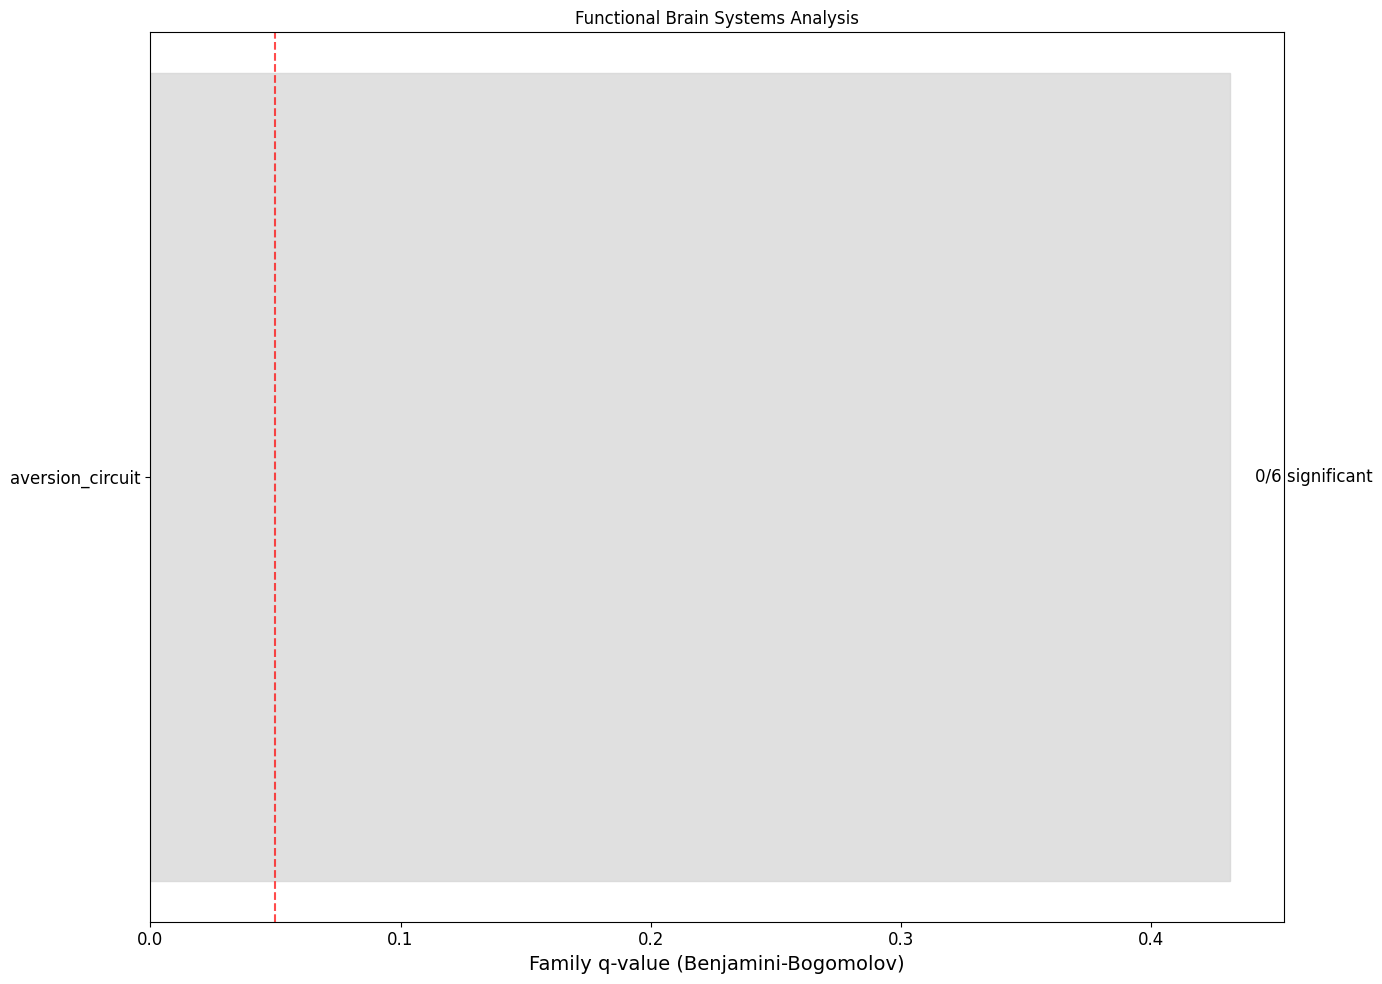

In [148]:
# Create a visualization of results
plt.figure(figsize=(14, 10))
family_names = list(bb_results.keys())
y_pos = np.arange(len(family_names))

# Plot the family q-values
family_q_values = [results['family_q_value'] for results in bb_results.values()]
bars = plt.barh(y_pos, family_q_values, alpha=0.7)

# Highlight bars of selected families
for i, family_name in enumerate(family_names):
    sig_count = len(bb_results[family_name]['significant'])
    total_count = len(bb_results[family_name]['df'])
    if sig_count > 0:
        bars[i].set_color('xkcd:wisteria')
        plt.text(family_q_values[i] + 0.01, y_pos[i], 
                f"{sig_count}/{total_count} significant", va='center')
    else:
        bars[i].set_color('lightgrey')
        plt.text(family_q_values[i] + 0.01, y_pos[i], 
                f"0/{total_count} significant", va='center')

plt.axvline(0.05, color='red', linestyle='--', alpha=0.7, label='q=0.05 threshold')
plt.yticks(y_pos, family_names)
plt.xlabel('Family q-value (Benjamini-Bogomolov)')
plt.title('Functional Brain Systems Analysis')
plt.tight_layout()
plt.savefig('plots_iDISCO/benjamini_bogomolov_families.png', dpi=300)
plt.show()

In [149]:
# For each selected family with significant regions, create a detailed plot
for family_name, results in bb_results.items():
    if len(results['significant']) == 0:
        continue
        
    # Create plot for this family
    df_sig = results['significant']
    n_regions = len(df_sig)
    
    plt.figure(figsize=(12, max(5, n_regions * 0.4)))
    
    # Prepare data for plotting
    regions = []
    baseline_means = []
    sensitised_means = []
    baseline_sems = []
    sensitised_sems = []
    p_values = []
    q_values = []
    
    for _, row in df_sig.iterrows():
        regions.append(row['name'])
        baseline_means.append(row['mean_baseline'])
        sensitised_means.append(row['mean_sensitised'])
        
        # Calculate SEM
        baseline_sems.append(row['sd_baseline'] / np.sqrt(row['n_baseline']))
        sensitised_sems.append(row['sd_sensitised'] / np.sqrt(row['n_sensitised']))
        
        p_values.append(row['p_value'])
        q_values.append(row['bb_q_value'])
    
    # Sort by effect size
    effect_sizes = [s-b for s, b in zip(sensitised_means, baseline_means)]
    sorted_indices = np.argsort(np.abs(effect_sizes))[::-1]  # Descending order
    
    # Reorder all lists
    regions = [regions[i] for i in sorted_indices]
    baseline_means = [baseline_means[i] for i in sorted_indices]
    sensitised_means = [sensitised_means[i] for i in sorted_indices]
    baseline_sems = [baseline_sems[i] for i in sorted_indices]
    sensitised_sems = [sensitised_sems[i] for i in sorted_indices]
    p_values = [p_values[i] for i in sorted_indices]
    q_values = [q_values[i] for i in sorted_indices]
    
    # Position for bars
    y_pos = np.arange(n_regions)
    bar_width = 0.4
    
    # Plot baseline bars
    plt.barh(y_pos - bar_width/2, baseline_means, bar_width, 
            color='grey', alpha=0.7, label='Baseline')
    
    # Plot sensitised bars
    plt.barh(y_pos + bar_width/2, sensitised_means, bar_width, 
            color='xkcd:wisteria', alpha=0.7, label='Sensitised')
    
    # Add error bars
    plt.errorbar(baseline_means, y_pos - bar_width/2, xerr=baseline_sems,
                fmt='none', ecolor='black', capsize=3)
    plt.errorbar(sensitised_means, y_pos + bar_width/2, xerr=sensitised_sems,
                fmt='none', ecolor='black', capsize=3)
    
    # Add p-value and q-value annotations
    for i in range(n_regions):
        p_text = f"p={p_values[i]:.4f}, q={q_values[i]:.4f}"
        x_pos = max(baseline_means[i], sensitised_means[i]) + max(baseline_sems[i], sensitised_sems[i]) + 0.0005
        plt.text(x_pos, y_pos[i], p_text, va='center', fontsize=9)
    
    # Add labels and formatting
    plt.yticks(y_pos, regions)
    plt.xlabel('cFos+ cells per voxel')
    plt.title(f'Significant Regions in {family_name}')
    plt.legend(loc='upper right')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    
    # Save figure
    safe_name = family_name.lower().replace(' ', '_').replace('/', '_')
    plt.savefig(f'plots_iDISCO/bb_significant_{safe_name}.png', dpi=300)
    plt.show()

In [145]:
# print a list of all the areas in hemisphere 255 that show a q-value < 0.05
print("\nBrain areas in hemisphere 255 with q-value < 0.05:")
for idx, row in df_base_ret_vs_sens_ret_data_sig.iterrows():
    if row['hemisphere'] == 255 and row['q_value'] < 0.05:
        print(f"- {row['name']} (q-value: {row['q_value']})")   


Brain areas in hemisphere 255 with q-value < 0.05:


In [114]:
# Check if cerebral peduncle is in the significant dataset
cerebral_peduncle = df_base_ret_vs_sens_ret_data_sig[
    df_base_ret_vs_sens_ret_data_sig['name'].str.contains('peduncle', case=False)]
print("Cerebral peduncle in significant results:", len(cerebral_peduncle) > 0)
if len(cerebral_peduncle) > 0:
    print(cerebral_peduncle[['name', 'p_value', 'p_sign', 'function']])

# Check if it's being excluded from motor category
if 'function' in cerebral_peduncle.columns and len(cerebral_peduncle) > 0:
    motor_related = cerebral_peduncle['function'].str.contains('motor|movement', case=False, na=False)
    print("Cerebral peduncle classified as motor-related:", motor_related.any())

Cerebral peduncle in significant results: True
                name   p_value  p_sign function
14  cerebal peduncle  0.038539       1      NaN
Cerebral peduncle classified as motor-related: False


In [115]:
# Check if fundus of striatum is in the significant dataset
fundus_striatum = df_base_ret_vs_sens_ret_data_sig[
    df_base_ret_vs_sens_ret_data_sig['name'].str.contains('striatum|fundus', case=False)]
print("Fundus of striatum in significant results:", len(fundus_striatum) > 0)
if len(fundus_striatum) > 0:
    print(fundus_striatum[['name', 'p_value', 'p_sign', 'function']])

# Check if it's being excluded from motor category
if 'function' in fundus_striatum.columns and len(fundus_striatum) > 0:
    motor_related = fundus_striatum['function'].str.contains('motor|movement', case=False, na=False)
    print("Fundus of striatum classified as motor-related:", motor_related.any())
    
    # If not classified as motor-related, print its current function
    if not motor_related.any():
        print("Current function description:", fundus_striatum['function'].values)

Fundus of striatum in significant results: True
                  name   p_value  p_sign  \
15  Fundus of striatum  0.035539       1   

                                   function  
15  Reward processing, movement, motivation  
Fundus of striatum classified as motor-related: True


In [116]:
# Display regions where baseline has more cFos than sensitized
print("REGIONS WITH HIGHER cFos IN BASELINE CONDITION:")
print("-----------------------------------------------")
for idx, row in df_base_ret_vs_sens_ret_data_sig_base.iterrows():
    print(f"- {row['name']} (p={row['p_value']:.4f})")

print("\nREGIONS WITH HIGHER cFos IN SENSITIZED CONDITION:")
print("--------------------------------------------------")
for idx, row in df_base_ret_vs_sens_ret_data_sig_sens.iterrows():
    print(f"- {row['name']} (p={row['p_value']:.4f})")

# Summary counts
print(f"\nSummary:")
print(f"- Total significant regions: {len(df_base_ret_vs_sens_ret_data_sig)}")
print(f"- Regions higher in baseline: {len(df_base_ret_vs_sens_ret_data_sig_base)}")
print(f"- Regions higher in sensitized: {len(df_base_ret_vs_sens_ret_data_sig_sens)}")

REGIONS WITH HIGHER cFos IN BASELINE CONDITION:
-----------------------------------------------
- Paraventricular hypothalamic nucleus (p=0.0364)
- Lateral amygdalar nucleus (p=0.0134)
- Accessory olfactory bulb, granular layer (p=0.0416)
- Reticular nucleus of the thalamus (p=0.0441)
- stria terminalis (p=0.0215)
- Bed nuclei of the stria terminalis (p=0.0120)
- Orbital area, lateral part, layer 2/3 (p=0.0284)
- dorsal limb (p=0.0288)
- Central amygdalar nucleus, capsular part (p=0.0097)
- Ventral posterolateral nucleus of the thalamus (p=0.0363)
- principal mammillary tract (p=0.0492)
- anterior commissure, temporal limb (p=0.0449)
- Posterodorsal preoptic nucleus (p=0.0167)
- cerebal peduncle (p=0.0385)
- Fundus of striatum (p=0.0355)
- Primary auditory area, layer 6b (p=0.0364)
- Hippocampo-amygdalar transition area (p=0.0400)

REGIONS WITH HIGHER cFos IN SENSITIZED CONDITION:
--------------------------------------------------
- Postpiriform transition area (p=0.0447)

Summary:
- T

In [117]:
# Group by functional category
if 'function' in df_base_ret_vs_sens_ret_data_sig.columns:
    print("\nFUNCTIONAL DISTRIBUTION OF SIGNIFICANT REGIONS:")
    print("-----------------------------------------------")
    
    # Extract main function categories
    for condition, df in [("Baseline > Sensitized", df_base_ret_vs_sens_ret_data_sig_base), 
                         ("Sensitized > Baseline", df_base_ret_vs_sens_ret_data_sig_sens)]:
        print(f"\n{condition}:")
        
        # Get counts by function category
        for category in ["sensory", "motor", "memory", "emotion"]:
            count = df['function'].str.contains(category, case=False, na=False).sum()
            if count > 0:
                print(f"- {category.title()} regions: {count}")


FUNCTIONAL DISTRIBUTION OF SIGNIFICANT REGIONS:
-----------------------------------------------

Baseline > Sensitized:
- Sensory regions: 6
- Memory regions: 2
- Emotion regions: 4

Sensitized > Baseline:
- Sensory regions: 1


In [122]:
# Print available functions in the module
print("Available functions in ida module:", [f for f in dir(ida) if not f.startswith('_')])

Available functions in ida module: ['apply_fdr_correction', 'category_dfs', 'col_base_ret', 'col_sens_ret', 'np', 'os', 'pd', 'plot_barplots', 'plot_brain_region', 'plot_vert_bar', 'plot_volcano', 'plot_volcano_with_fdr', 'plt', 'sns']


In [133]:


# Instead of your custom function, use:
def apply_fdr_correction(df, p_value_col='p_value', fdr_threshold=0.05):
    # Filter for hemisphere 255 if needed
    if 'hemisphere' in df.columns:
        df_to_correct = df[df['hemisphere'] == 255].copy()
    else:
        df_to_correct = df.copy()
    
    # Apply FDR correction
    p_values = df_to_correct[p_value_col].values
    reject, q_values, _, _ = multipletests(p_values, alpha=fdr_threshold, method='fdr_bh')
    
    # Add results to dataframe
    df_to_correct['q_value'] = q_values
    df_to_correct['is_significant'] = reject
    
    # Create significant dataframe
    significant = df_to_correct[df_to_correct['is_significant']]
    
    print(f"FDR correction applied with threshold {fdr_threshold}:")
    print(f"- Original significant regions (p < 0.05): {len(df_to_correct[df_to_correct[p_value_col] < 0.05])}")
    print(f"- Significant regions after FDR correction: {len(significant)}")
    
    return df_to_correct, significant

In [151]:
#### using the same functional groups, correct with FDR only within groups so treat them as independent 
def apply_within_group_fdr(df, functional_groups, p_value_col='p_value', fdr_threshold=0.05):
    """
    Apply FDR correction separately within each functional group
    """
    from statsmodels.stats.multitest import multipletests
    import numpy as np
    
    # Filter to hemisphere 255
    if 'hemisphere' in df.columns:
        df = df[df['hemisphere'] == 255].copy()
    
    # Results dictionary
    results = {}
    
    # Process each functional group independently
    for group_name, region_list in functional_groups.items():
        # Get regions in this group
        group_df = df[df['name'].isin(region_list)].copy()
        
        if len(group_df) >= 2:  # Need at least 2 regions for meaningful correction
            # Apply FDR correction within this group
            p_values = group_df[p_value_col].values
            reject, q_values, _, _ = multipletests(p_values, alpha=fdr_threshold, method='fdr_bh')
            
            # Add q-values to dataframe
            group_df['q_value'] = q_values
            group_df['significant'] = reject
            
            # Store significant regions
            sig_regions = group_df[group_df['significant']]
            
            results[group_name] = {
                'all_regions': group_df,
                'significant_regions': sig_regions,
                'n_tested': len(group_df),
                'n_significant': len(sig_regions)
            }
            
            # Print results
            print(f"\nGroup: {group_name}")
            print(f"  Regions tested: {len(group_df)}")
            print(f"  Significant after FDR correction: {len(sig_regions)}")
            
            if len(sig_regions) > 0:
                print("  Significant regions:")
                for _, row in sig_regions.iterrows():
                    effect = "Higher in sensitised" if row['mean_sensitised'] > row['mean_baseline'] else "Higher in baseline"
                    print(f"   - {row['name']}: p={row[p_value_col]:.4f}, q={row['q_value']:.4f} ({effect})")
    
    return results


Group: olfaction_pheromonal_processing
  Regions tested: 20
  Significant after FDR correction: 0

Group: tactile_sensory_information
  Regions tested: 57
  Significant after FDR correction: 0

Group: approach_circuit
  Regions tested: 7
  Significant after FDR correction: 0

Group: aversion_circuit
  Regions tested: 6
  Significant after FDR correction: 0

Group: parenting_circuit
  Regions tested: 7
  Significant after FDR correction: 0

Group: social_circuit
  Regions tested: 8
  Significant after FDR correction: 0


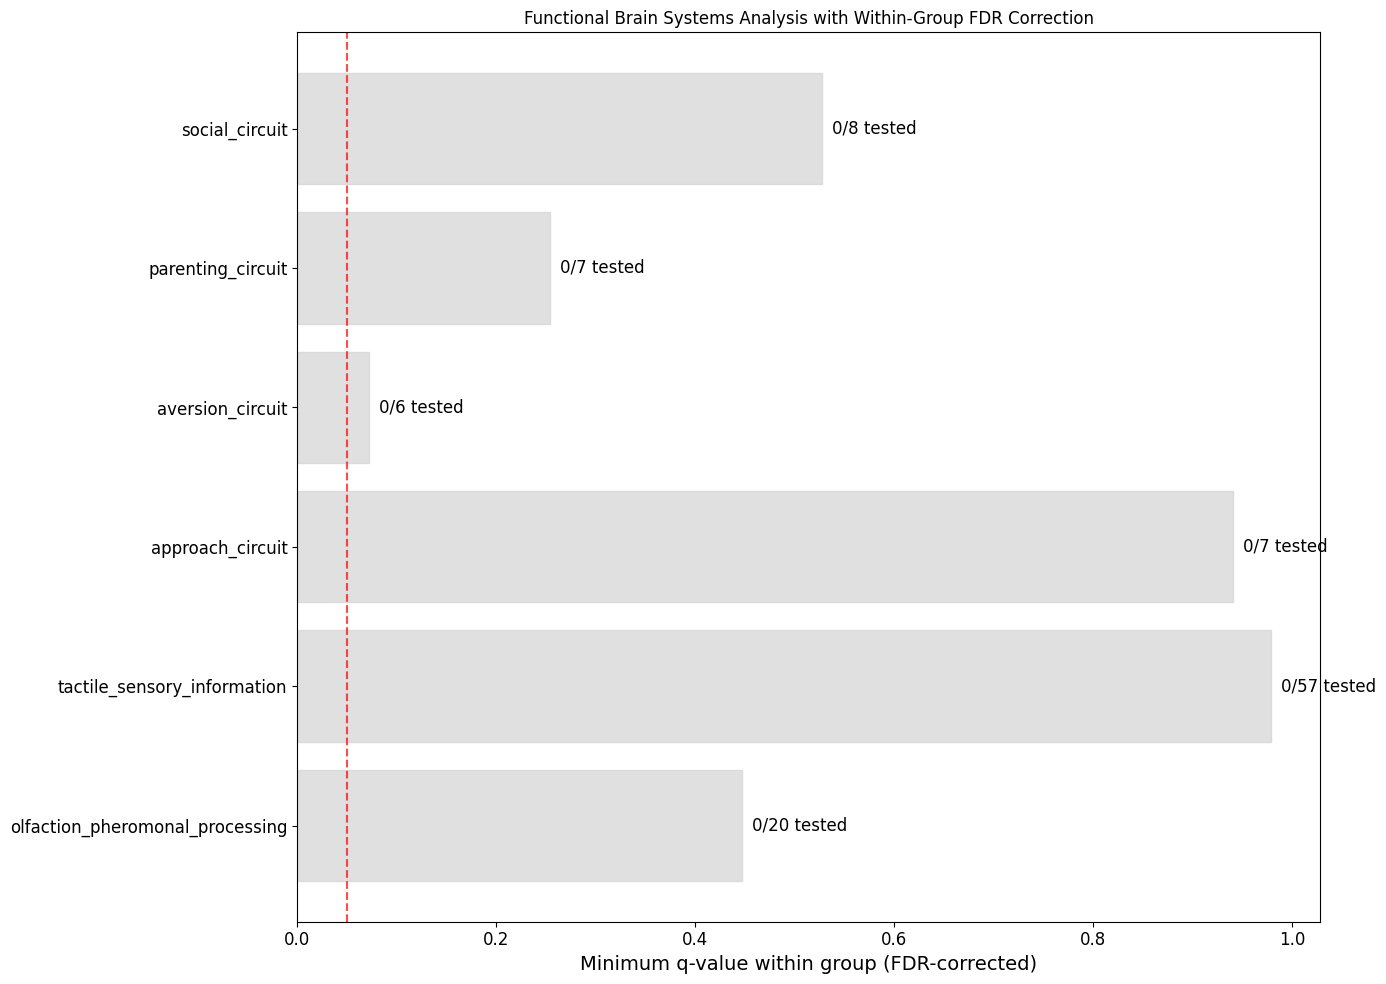


No significant regions found after within-group FDR correction.


In [152]:
# Apply within-group FDR correction with threshold 0.05
within_group_results = apply_within_group_fdr(
    df_base_ret_vs_sens_ret_data, 
    functional_groups, 
    p_value_col='p_value', 
    fdr_threshold=0.05
)

# Create visualization of the results (similar to the BB method visualization)
plt.figure(figsize=(14, 10))
group_names = list(within_group_results.keys())
y_pos = np.arange(len(group_names))

# Extract key metrics for plotting
group_metrics = []
for group_name in group_names:
    results = within_group_results[group_name]
    sig_count = len(results['significant_regions'])
    total_count = results['n_tested']
    
    # Calculate mean q-value for the group
    mean_q = results['all_regions']['q_value'].mean()
    
    group_metrics.append({
        'name': group_name,
        'sig_count': sig_count,
        'total_count': total_count,
        'mean_q': mean_q,
        'min_q': results['all_regions']['q_value'].min() if len(results['all_regions']) > 0 else 1.0
    })

# Sort by number of significant findings (descending)
group_metrics = sorted(group_metrics, key=lambda x: x['sig_count'], reverse=True)
group_names = [x['name'] for x in group_metrics]
min_q_values = [x['min_q'] for x in group_metrics]

# Plot the group summary
bars = plt.barh(y_pos, min_q_values, alpha=0.7)

# Color the bars based on significance
for i, metrics in enumerate(group_metrics):
    if metrics['sig_count'] > 0:
        bars[i].set_color('xkcd:wisteria')
        plt.text(min_q_values[i] + 0.01, y_pos[i], 
                f"{metrics['sig_count']}/{metrics['total_count']} significant", va='center')
    else:
        bars[i].set_color('lightgrey')
        plt.text(min_q_values[i] + 0.01, y_pos[i], 
                f"0/{metrics['total_count']} tested", va='center')

plt.axvline(0.05, color='red', linestyle='--', alpha=0.7, label='q=0.05 threshold')
plt.yticks(y_pos, group_names)
plt.xlabel('Minimum q-value within group (FDR-corrected)')
plt.title('Functional Brain Systems Analysis with Within-Group FDR Correction')
plt.tight_layout()
plt.savefig('plots_iDISCO/within_group_fdr_summary.png', dpi=300)
plt.show()

# For each group with significant regions, create a detailed plot
for group_name, results in within_group_results.items():
    if len(results['significant_regions']) == 0:
        continue
        
    # Create plot for this group
    df_sig = results['significant_regions']
    n_regions = len(df_sig)
    
    plt.figure(figsize=(12, max(5, n_regions * 0.4)))
    
    # Prepare data for plotting
    regions = []
    baseline_means = []
    sensitised_means = []
    baseline_sems = []
    sensitised_sems = []
    p_values = []
    q_values = []
    
    for _, row in df_sig.iterrows():
        regions.append(row['name'])
        baseline_means.append(row['mean_baseline'])
        sensitised_means.append(row['mean_sensitised'])
        
        # Calculate SEM
        baseline_sems.append(row['sd_baseline'] / np.sqrt(row['n_baseline']))
        sensitised_sems.append(row['sd_sensitised'] / np.sqrt(row['n_sensitised']))
        
        p_values.append(row['p_value'])
        q_values.append(row['q_value'])
    
    # Sort by effect size
    effect_sizes = [abs(s-b) for s, b in zip(sensitised_means, baseline_means)]
    sorted_indices = np.argsort(effect_sizes)[::-1]  # Descending order
    
    # Reorder all lists
    regions = [regions[i] for i in sorted_indices]
    baseline_means = [baseline_means[i] for i in sorted_indices]
    sensitised_means = [sensitised_means[i] for i in sorted_indices]
    baseline_sems = [baseline_sems[i] for i in sorted_indices]
    sensitised_sems = [sensitised_sems[i] for i in sorted_indices]
    p_values = [p_values[i] for i in sorted_indices]
    q_values = [q_values[i] for i in sorted_indices]
    
    # Position for bars
    y_pos = np.arange(n_regions)
    bar_width = 0.4
    
    # Plot baseline bars
    plt.barh(y_pos - bar_width/2, baseline_means, bar_width, 
            color='grey', alpha=0.7, label='Baseline')
    
    # Plot sensitised bars
    plt.barh(y_pos + bar_width/2, sensitised_means, bar_width, 
            color='xkcd:wisteria', alpha=0.7, label='Sensitised')
    
    # Add error bars
    plt.errorbar(baseline_means, y_pos - bar_width/2, xerr=baseline_sems,
                fmt='none', ecolor='black', capsize=3)
    plt.errorbar(sensitised_means, y_pos + bar_width/2, xerr=sensitised_sems,
                fmt='none', ecolor='black', capsize=3)
    
    # Add p-value and q-value annotations
    for i in range(n_regions):
        p_text = f"p={p_values[i]:.4f}, q={q_values[i]:.4f}"
        x_pos = max(baseline_means[i], sensitised_means[i]) + max(baseline_sems[i], sensitised_sems[i]) + 0.0005
        plt.text(x_pos, y_pos[i], p_text, va='center', fontsize=9)
    
    # Add labels and formatting
    plt.yticks(y_pos, regions)
    plt.xlabel('cFos+ cells per voxel')
    plt.title(f'Significant Regions in {group_name} (Within-Group FDR)')
    plt.legend(loc='upper right')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine()
    plt.tight_layout()
    
    # Save figure
    safe_name = group_name.lower().replace(' ', '_').replace('/', '_')
    plt.savefig(f'plots_iDISCO/wgfdr_significant_{safe_name}.png', dpi=300)
    plt.show()

# Create a consolidated list of all significant regions across all functional groups
all_significant_regions = []
for group_name, results in within_group_results.items():
    if len(results['significant_regions']) > 0:
        for _, row in results['significant_regions'].iterrows():
            all_significant_regions.append({
                'name': row['name'],
                'functional_group': group_name,
                'p_value': row['p_value'],
                'q_value': row['q_value'],
                'mean_baseline': row['mean_baseline'],
                'mean_sensitised': row['mean_sensitised'],
                'direction': 'Higher in sensitised' if row['mean_sensitised'] > row['mean_baseline'] else 'Higher in baseline'
            })

# Convert to DataFrame and sort by q-value
if all_significant_regions:
    all_sig_df = pd.DataFrame(all_significant_regions)
    all_sig_df = all_sig_df.sort_values('q_value')
    
    print("\nAll significant regions after within-group FDR correction:")
    print(all_sig_df[['name', 'functional_group', 'p_value', 'q_value', 'direction']])
else:
    print("\nNo significant regions found after within-group FDR correction.")

In [137]:
def plot_volcano_with_fdr(df, df_sig, grp1, grp2, colors, use_fdr=True, fdr_threshold=0.05):
    """
    Create a volcano plot with optional FDR correction.
    
    Parameters:
    -----------
    df : DataFrame
        Complete dataset with all brain regions
    df_sig : DataFrame
        Only significant regions (p < 0.05 or q < threshold if use_fdr=True)
    grp1, grp2 : str
        Group names for comparison
    colors : list
        Colors for plotting [color_for_grp1, color_for_grp2]
    use_fdr : bool, default=True
        Whether to apply FDR correction
    fdr_threshold : float, default=0.05
        FDR threshold for significance
        
    Returns:
    --------
    DataFrame
        Modified dataframe with additional columns (original or FDR-corrected)
    """
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from statsmodels.stats.multitest import multipletests
    
    # Don't modify original dataframes
    df = df.copy()
    df_sig = df_sig.copy()
    
    # Set plot styling
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16
    
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('xtick', labelsize=SMALL_SIZE)
    plt.rc('ytick', labelsize=SMALL_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    plt.rc('figure', titlesize=BIGGER_SIZE)
    
    if use_fdr:
        # Filter for hemisphere 255 if needed
        if 'hemisphere' in df.columns:
            df_to_correct = df[df['hemisphere'] == 255].copy()
        else:
            df_to_correct = df.copy()
        
        # Apply FDR correction
        p_values = df_to_correct["p_value"].values
        reject, q_values, _, _ = multipletests(p_values, alpha=fdr_threshold, method='fdr_bh')
        
        # Add results to dataframe
        df_to_correct['q_value'] = q_values
        df_to_correct['is_significant'] = reject
        
        # Create significant dataframe
        df_sig_fdr = df_to_correct[df_to_correct['is_significant']]
        
        print(f"FDR correction applied with threshold {fdr_threshold}:")
        print(f"- Original significant regions (p < 0.05): {len(df_to_correct[df_to_correct['p_value'] < 0.05])}")
        print(f"- Significant regions after FDR correction: {len(df_sig_fdr)}")
        
        df_corrected = df_to_correct
        
        # Calculate fold changes for all regions
        df_corrected["fc"] = df_corrected["mean_"+grp1]/df_corrected["mean_"+grp2]
        df_corrected["log2fc"] = np.log2(df_corrected["fc"])
        df_corrected["neglog10p"] = np.log10(df_corrected["p_value"]) * (-1)
        df_corrected["neglog10q"] = np.log10(df_corrected["q_value"]) * (-1)
        
        # Ensure df_sig_fdr has log2fc column
        if len(df_sig_fdr) > 0 and 'log2fc' not in df_sig_fdr.columns:
            df_sig_fdr["fc"] = df_sig_fdr["mean_"+grp1]/df_sig_fdr["mean_"+grp2]
            df_sig_fdr["log2fc"] = np.log2(df_sig_fdr["fc"])
            df_sig_fdr["neglog10p"] = np.log10(df_sig_fdr["p_value"]) * (-1)
            df_sig_fdr["neglog10q"] = np.log10(df_sig_fdr["q_value"]) * (-1)
        
        # Plot with FDR-corrected values
        plt.figure(figsize=(8, 6))
        
        # Plot all points in gray
        plt.scatter(
            df_corrected["log2fc"],
            df_corrected["neglog10q"],  # Use q-values for y-axis to match significance filtering
            color="lightgray", alpha=0.7, s=25, label="Non-significant"
        )
        
        # Filter significant points after FDR
        if len(df_sig_fdr) > 0:
            df_sig_pos = df_sig_fdr[df_sig_fdr["log2fc"] > 0]
            df_sig_neg = df_sig_fdr[df_sig_fdr["log2fc"] < 0]
            
            # Plot significant points
            if len(df_sig_pos) > 0:
                plt.scatter(
                    df_sig_pos["log2fc"], df_sig_pos["neglog10q"],
                    color=colors[0], alpha=0.9, s=40, label=f"Higher in {grp1}"
                )
            if len(df_sig_neg) > 0:
                plt.scatter(
                    df_sig_neg["log2fc"], df_sig_neg["neglog10q"],
                    color=colors[1], alpha=0.9, s=40, label=f"Higher in {grp2}"
                )
        
        # Add significance lines
        sig_thresh_p = np.log10(0.05) * (-1)
        sig_thresh_q = np.log10(fdr_threshold) * (-1)
        
        plt.axhline(y=sig_thresh_q, color='k', linestyle='-', alpha=0.8, label=f'q < {fdr_threshold}')
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        
        title_suffix = f" (FDR q < {fdr_threshold})"
        y_label = "-log10 q-value"
        
    else:
        # Original calculation without FDR
        df_filtered = df.copy()
        if 'hemisphere' in df.columns:
            df_filtered = df_filtered[df_filtered['hemisphere'] == 255]
        
        df_filtered["fc"] = df_filtered["mean_"+grp1]/df_filtered["mean_"+grp2]
        df_filtered["log2fc"] = np.log2(df_filtered["fc"])
        df_filtered["neglog10p"] = np.log10(df_filtered["p_value"]) * (-1)
        
        df_sig["fc"] = df_sig["mean_"+grp1]/df_sig["mean_"+grp2]
        df_sig["log2fc"] = np.log2(df_sig["fc"])
        df_sig["neglog10p"] = np.log10(df_sig["p_value"]) * (-1)
        
        plt.figure(figsize=(8, 6))
        
        # Plot non-significant points
        df_nonsig = df_filtered[~df_filtered.index.isin(df_sig.index)]
        plt.scatter(
            df_nonsig["log2fc"],
            df_nonsig["neglog10p"],
            color="lightgray", alpha=0.7, s=25, label="Non-significant"
        )
        
        # Plot significant points
        df_sig_pos = df_sig[df_sig["log2fc"]>0]
        df_sig_neg = df_sig[df_sig["log2fc"]<0]
        
        if len(df_sig_pos) > 0:
            plt.scatter(
                df_sig_pos["log2fc"], 
                df_sig_pos["neglog10p"],
                color=colors[0], alpha=0.9, s=40, label=f"Higher in {grp1}"
            )
        
        if len(df_sig_neg) > 0:
            plt.scatter(
                df_sig_neg["log2fc"], 
                df_sig_neg["neglog10p"],
                color=colors[1], alpha=0.9, s=40, label=f"Higher in {grp2}"
            )
        
        sig_thresh = np.log10(0.05) * (-1)
        plt.axhline(y=sig_thresh, color='k', linestyle='--', alpha=0.5, label='p < 0.05')
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        
        title_suffix = ""
        y_label = "-log10 p-value"
        df_corrected = df_filtered
    
    plt.xlabel("log2 fold change", fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(f"{grp1} vs {grp2}{title_suffix}", fontsize=16)
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Remove top and right spines
    sns.despine()
    plt.tight_layout()
    
    # Create plots_iDISCO directory in current directory (works in notebooks)
    plots_dir = "plots_iDISCO"
    os.makedirs(plots_dir, exist_ok=True)
    
    suffix = "_fdr" if use_fdr else ""
    plt.savefig(os.path.join(plots_dir, f"{grp1}_vs_{grp2}{suffix}.png"), dpi=300, bbox_inches="tight")
    plt.savefig(os.path.join(plots_dir, f"{grp1}_vs_{grp2}{suffix}.pdf"), bbox_inches="tight")
    plt.show()
    
    return df_corrected

FDR correction applied with threshold 0.1:
- Original significant regions (p < 0.05): 18
- Significant regions after FDR correction: 0
- Adjusted p-value threshold: 0.0000
FDR correction applied with threshold 0.05:
- Original significant regions (p < 0.05): 18
- Significant regions after FDR correction: 0


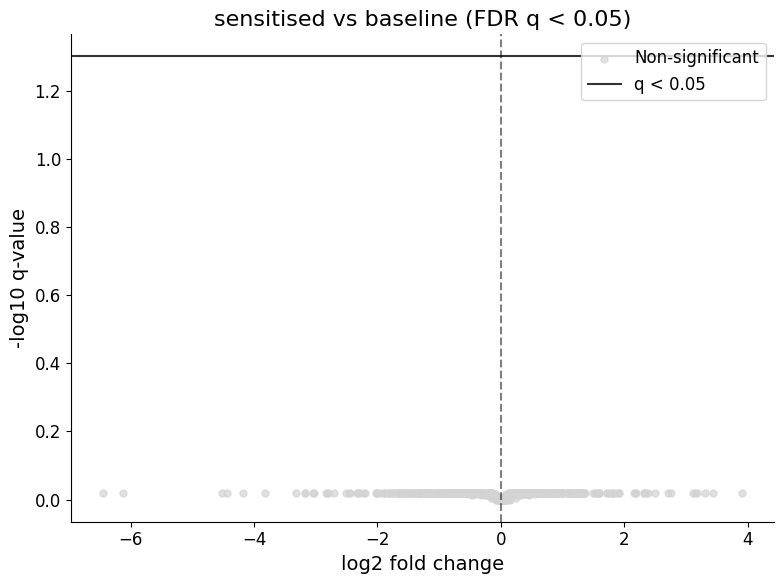

,Unnamed: 0,id,name,volume,hemisphere,baseline_counts_18,baseline_counts_19,baseline_counts_22,baseline_counts_23,mean_baseline,...,mean_sensitised,sd_sensitised,p_value,q_value,p_sign,fc,log2fc,neglog10p,is_significant,neglog10q
219,664,0,universe,3.491650e+11,255,57727,43631,85162,79556,66519.00,...,68916.50,32181.264669,0.903401,0.991793,-1,1.036042,0.051083,0.044119,False,0.003579
220,665,1,"Tuberomammillary nucleus, ventral part",5.418750e+07,255,27,90,133,87,84.25,...,294.50,233.635756,0.168993,0.959433,-1,3.495549,1.805519,0.772130,False,0.017985
221,666,2,"Primary somatosensory area, mouth, layer 6b",5.732812e+07,255,7,9,32,9,14.25,...,14.00,9.416298,0.974800,1.000000,1,0.982456,-0.025535,0.011085,False,-0.000000
222,667,6,internal capsule,1.049969e+09,255,222,211,319,232,246.00,...,282.50,192.365104,0.734951,0.965002,-1,1.148374,0.199593,0.133742,False,0.015472
223,668,7,Principal sensory nucleus of the trigeminal,5.475781e+08,255,134,82,530,152,224.50,...,356.50,119.371968,0.319521,0.959433,-1,1.587973,0.667187,0.495501,False,0.017985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,1323,607344850,"Interpeduncular nucleus, intermediate",1.654688e+07,255,0,0,0,21,5.25,...,0.75,0.500000,0.454583,0.959433,1,0.142857,-2.807355,0.342387,False,0.017985
852,1325,607344858,"Interpeduncular nucleus, dorsolateral",1.887500e+07,255,0,0,0,7,1.75,...,3.75,2.753785,0.405520,0.959433,-1,2.142857,1.099536,0.391987,False,0.017985
853,1326,607344862,"Interpeduncular nucleus, rostrolateral",9.671875e+06,255,2,0,0,13,3.75,...,6.00,6.164414,0.626222,0.959433,-1,1.600000,0.678072,0.203272,False,0.017985
854,1327,614454277,Supraoculomotor periaqueductal gray,2.095312e+07,255,8,7,14,0,7.25,...,6.75,6.898067,0.915007,0.992946,1,0.931034,-0.103093,0.038576,False,0.003074


In [150]:
# Apply FDR correction and create volcano plot
df_corrected, df_significant_fdr = ida.apply_fdr_correction(
    df_base_ret_vs_sens_ret_data, 
    p_value_col='p_value', 
    fdr_threshold=0.1  # Try 0.1 or 0.15 instead of 0.05
)

# Create volcano plot with FDR correction
plot_volcano_with_fdr(df_base_ret_vs_sens_ret_data, df_significant_fdr, 
                      "sensitised", "baseline", [col_sens_ret, col_base_ret])

Individual data points could not be plotted (raw data not available)


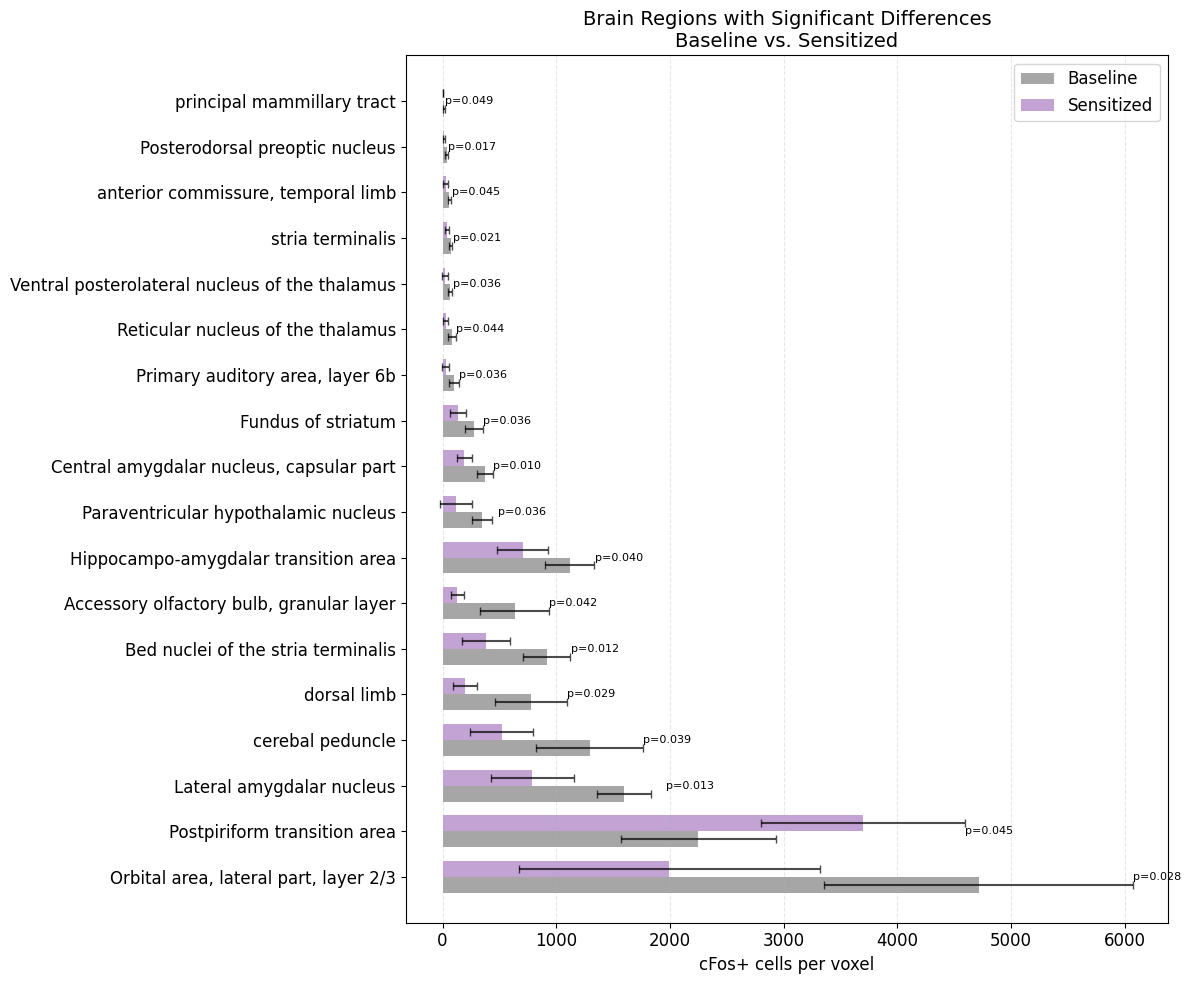

In [ ]:


def create_publication_plot(df_sig, df_raw, baseline_col, sensitized_col):

    
    # Combine all significant regions
    df_combined = pd.concat([df_base_ret_vs_sens_ret_data_sig_base, df_base_ret_vs_sens_ret_data_sig_sens])
    
    # Sort by absolute difference in means (effect size)
    df_combined['effect_size'] = abs(df_combined[f'mean_{baseline_col}'] - df_combined[f'mean_{sensitized_col}'])
    df_combined = df_combined.sort_values('effect_size', ascending=False)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Get region names and number of regions
    regions = df_combined['name'].values
    n_regions = len(regions)
    
    # Setup x positions for bars and dots
    positions = np.arange(n_regions)
    bar_width = 0.35
    
    # Extract values
    baseline_means = df_combined[f'mean_{baseline_col}'].values
    sensitized_means = df_combined[f'mean_{sensitized_col}'].values
    baseline_sds = df_combined[f'sd_{baseline_col}'].values
    sensitized_sds = df_combined[f'sd_{sensitized_col}'].values
    
    # Plot bars
    baseline_bars = ax.barh(positions - bar_width/2, baseline_means, bar_width, 
                           label='Baseline', color='grey', alpha=0.7)
    sensitized_bars = ax.barh(positions + bar_width/2, sensitized_means, bar_width,
                             label='Sensitized', color='xkcd:wisteria', alpha=0.7)
    
    # Add error bars
    ax.errorbar(baseline_means, positions - bar_width/2, xerr=baseline_sds, 
                fmt='none', ecolor='black', capsize=3, alpha=0.7)
    ax.errorbar(sensitized_means, positions + bar_width/2, xerr=sensitized_sds, 
                fmt='none', ecolor='black', capsize=3, alpha=0.7)
    
    # Find individual data points if available
    try:
        # Prepare for scatter plot points
        for i, region in enumerate(regions):
            # Get raw data for this region
            region_data = df_raw[df_raw['name'] == region]
            
            # Extract individual data points (if available)
            baseline_points = region_data[baseline_col].values
            sensitized_points = region_data[sensitized_col].values
            
            # Add jitter to y-position
            y_jitter = np.random.normal(0, 0.05, len(baseline_points))
            
            # Plot individual data points
            ax.scatter(baseline_points, [positions[i] - bar_width/2 + j for j in y_jitter], 
                     color='black', s=20, alpha=0.7)
            
            y_jitter = np.random.normal(0, 0.05, len(sensitized_points))
            ax.scatter(sensitized_points, [positions[i] + bar_width/2 + j for j in y_jitter], 
                     color='black', s=20, alpha=0.7)
    except:
        print("Individual data points could not be plotted (raw data not available)")
    
    # # Annotate p-values
    # for i, row in enumerate(df_combined.itertuples()):
    #     p_value = row.p_value
    #     p_str = f"p={p_value:.3f}" if p_value >= 0.001 else "p<0.001"
    #     ax.text(max(baseline_means[i], sensitized_means[i]) + max(baseline_sds[i], sensitized_sds[i]) + 0.01, 
    #             positions[i], p_str, va='center', fontsize=8)
    
    # Set y-axis labels and limits
    ax.set_yticks(positions)
    ax.set_yticklabels(regions)
    ax.set_ylim(positions.min() - 1, positions.max() + 1)
    
    # Add labels and title
    ax.set_xlabel('cFos+ cells per voxel', fontsize=12)
    ax.set_title('Brain Regions with Significant Differences\nBaseline vs. Sensitized', fontsize=14)
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Adjust layout and grid
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    
    # Save figure
    plt.savefig('plots_iDISCO/brain_regions_significant_differences.png', dpi=300, bbox_inches='tight')
    # save as eps for publication
    plt.savefig('plots_iDISCO/brain_regions_significant_differences.eps', format='eps', bbox_inches='tight')
    # save as pdf for publication
    # plt.savefig('brain_regions_significant_differences.pdf', bbox_inches='tight')
    
    return fig, ax

# Call the function (adjust column names if needed)
# You might need to find the raw data with individual measurements
fig, ax = create_publication_plot(df_base_ret_vs_sens_ret_data_sig, 
                                 df_base_ret_vs_sens_ret_data,  # This should be the raw data with individual measurements
                                 'baseline', 'sensitised')

In [2]:
import seaborn as sns

Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Removed 5 fiber pathways from the plot


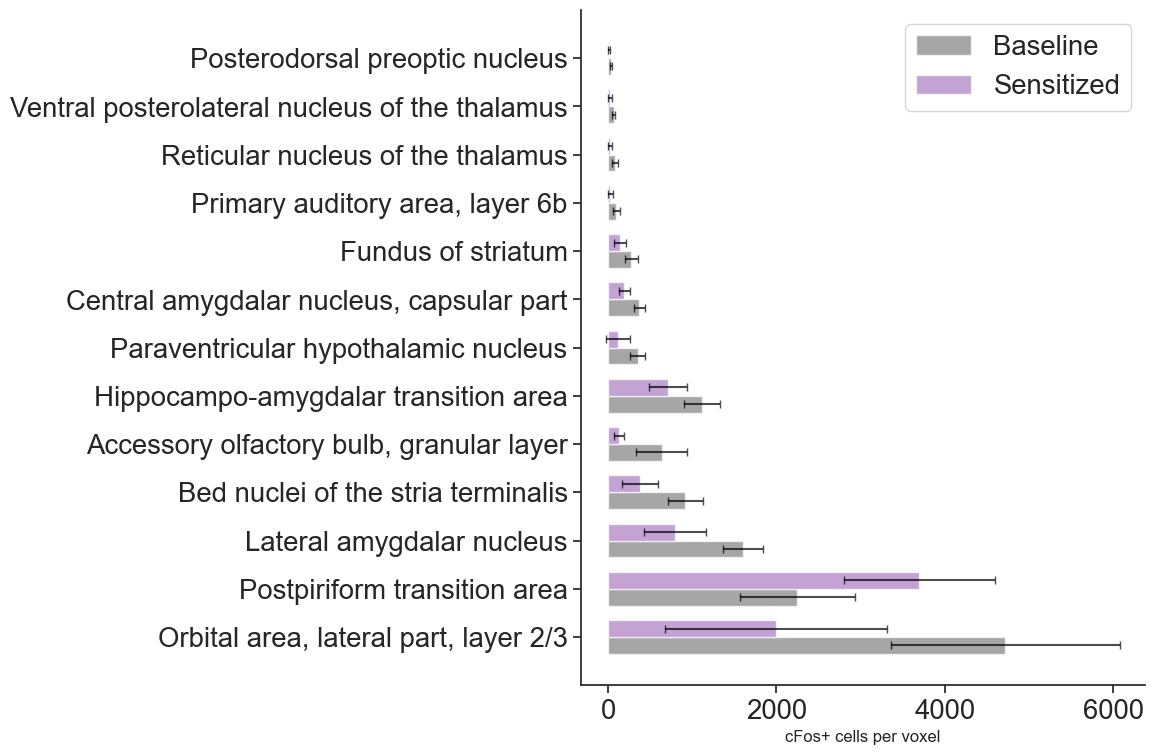

In [20]:
sns.set(font_scale=1.8)
sns.set_style("ticks")

def create_publication_plot_without_fibers(df_sig, df_raw, baseline_col, sensitized_col):
    # List of fiber pathways to exclude
    fiber_pathways = [
        'stria terminalis', 
        'principal mammillary tract', 
        'anterior commissure, temporal limb',
        'dorsal limb',
        'cerebal peduncle'  # Note: matches the spelling in your data
    ]
    
    # Combine all significant regions
    df_combined = pd.concat([df_base_ret_vs_sens_ret_data_sig_base, df_base_ret_vs_sens_ret_data_sig_sens])
    
    # Filter out fiber pathways
    df_combined = df_combined[~df_combined['name'].str.lower().isin([path.lower() for path in fiber_pathways])]
    
    # Sort by absolute difference in means (effect size)
    df_combined['effect_size'] = abs(df_combined[f'mean_{baseline_col}'] - df_combined[f'mean_{sensitized_col}'])
    df_combined = df_combined.sort_values('effect_size', ascending=False)
    
    # Create figure with size proportional to number of regions
    n_regions = len(df_combined)
    fig_height = max(8, n_regions * 0.4)  # Minimum height of 8 inches
    fig, ax = plt.subplots(figsize=(12, fig_height))
    
    # Get region names and number of regions
    regions = df_combined['name'].values
    
    # Setup x positions for bars and dots
    positions = np.arange(n_regions)
    bar_width = 0.35
    
    # Extract values
    baseline_means = df_combined[f'mean_{baseline_col}'].values
    sensitized_means = df_combined[f'mean_{sensitized_col}'].values
    baseline_sds = df_combined[f'sd_{baseline_col}'].values
    sensitized_sds = df_combined[f'sd_{sensitized_col}'].values
    
    # Plot bars
    baseline_bars = ax.barh(positions - bar_width/2, baseline_means, bar_width, 
                           label='Baseline', color='grey', alpha=0.7)
    sensitized_bars = ax.barh(positions + bar_width/2, sensitized_means, bar_width,
                             label='Sensitized', color='xkcd:wisteria', alpha=0.7)
    
    # Add error bars
    ax.errorbar(baseline_means, positions - bar_width/2, xerr=baseline_sds, 
                fmt='none', ecolor='black', capsize=3, alpha=0.7)
    ax.errorbar(sensitized_means, positions + bar_width/2, xerr=sensitized_sds, 
                fmt='none', ecolor='black', capsize=3, alpha=0.7)
    
    # Find individual data points if available
    try:
        # Filter raw data for the selected regions only
        filtered_raw = df_raw[df_raw['name'].isin(regions)]
        
        # Prepare for scatter plot points
        for i, region in enumerate(regions):
            # Get raw data for this region
            region_data = filtered_raw[filtered_raw['name'] == region]
            
            # Extract individual data points (if available)
            baseline_points = region_data[baseline_col].values
            sensitized_points = region_data[sensitized_col].values
            
            # Add jitter to y-position
            y_jitter = np.random.normal(0, 0.05, len(baseline_points))
            
            # Plot individual data points
            ax.scatter(baseline_points, [positions[i] - bar_width/2 + j for j in y_jitter], 
                     color='black', s=20, alpha=0.7)
            
            y_jitter = np.random.normal(0, 0.05, len(sensitized_points))
            ax.scatter(sensitized_points, [positions[i] + bar_width/2 + j for j in y_jitter], 
                     color='black', s=20, alpha=0.7)
    except Exception as e:
        print(f"Error plotting individual data points: {e}")
    
    # # Annotate p-values
    # for i, row in enumerate(df_combined.itertuples()):
    #     p_value = row.p_value
    #     p_str = f"p={p_value:.3f}" if p_value >= 0.001 else "p<0.001"
    #     ax.text(max(baseline_means[i], sensitized_means[i]) + max(baseline_sds[i], sensitized_sds[i]) + 0.01, 
    #             positions[i], p_str, va='center', fontsize=8)
    
    # Set y-axis labels and limits
    ax.set_yticks(positions)
    ax.set_yticklabels(regions)
    ax.set_ylim(positions.min() - 1, positions.max() + 1)
    
    # Add labels and title
    ax.set_xlabel('cFos+ cells per voxel', fontsize=12)
    # ax.set_title('Brain Regions with Significant Differences\nBaseline vs. Sensitized', fontsize=14)
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Adjust layout and grid
    # ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.grid(False)
    sns.despine()
    plt.tight_layout()
    
    # Save figure
    plt.savefig('plots_iDISCO/brain_regions_significant_differences_no_fibers.png', dpi=300, bbox_inches='tight')
    # save as eps for publication
    plt.savefig('plots_iDISCO/brain_regions_significant_differences_no_fibers.eps', format='eps', bbox_inches='tight')
    # save as pdf for publication
    # plt.savefig('brain_regions_significant_differences_no_fibers.pdf', bbox_inches='tight')
    
    # Print removed regions count
    print(f"Removed {len(fiber_pathways)} fiber pathways from the plot")
    
    return fig, ax

# Call the function
fig, ax = create_publication_plot_without_fibers(df_base_ret_vs_sens_ret_data_sig, 
                                              df_base_ret_vs_sens_ret_data,
                                              'baseline', 'sensitised')

Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Created plot for category: Hypothalamic & Preoptic Regions with 2 regions
Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Created plot for category: Amygdala & Extended Amygdala with 4 regions
Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Created plot for category: Olfactory System with 2 regions
Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Created plot for category: Thalamic Sensory & Gating Nuclei with 2 regions
Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Created plot for category: Basal Ganglia / Motivational Loop with 1 regions
Error plotting individual data points: 'baseline'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Created plot for category: Cerebral & Auditory Cortex with 2 regions
No matching regions found for category: White-Matter / Fibre Pathways


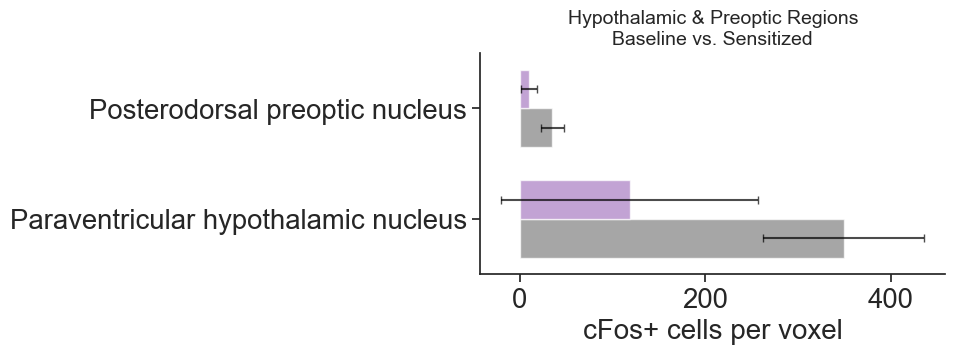

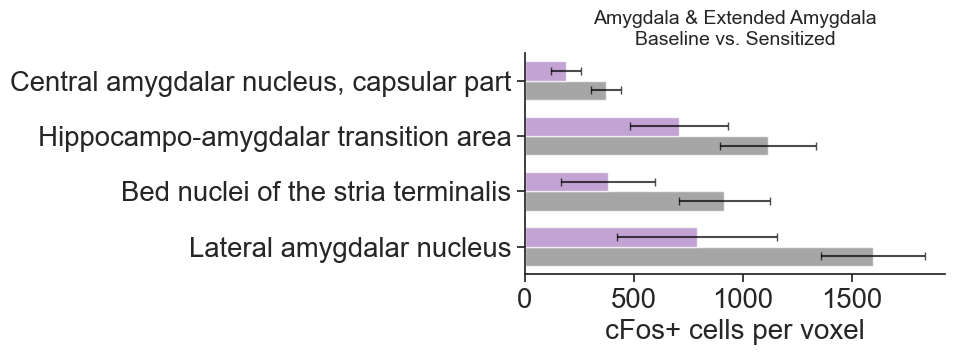

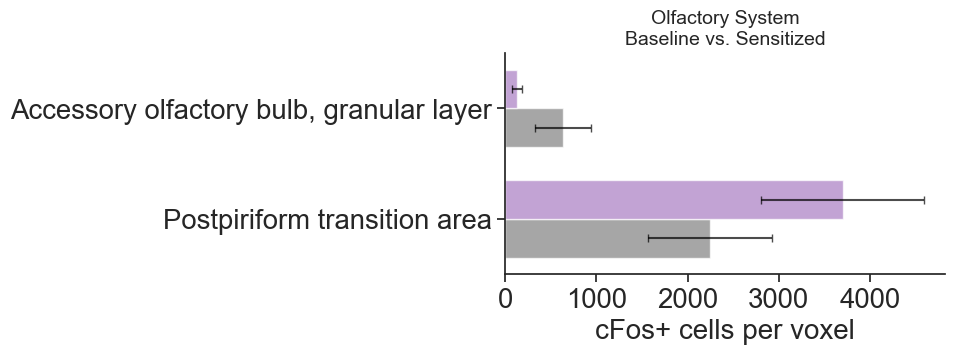

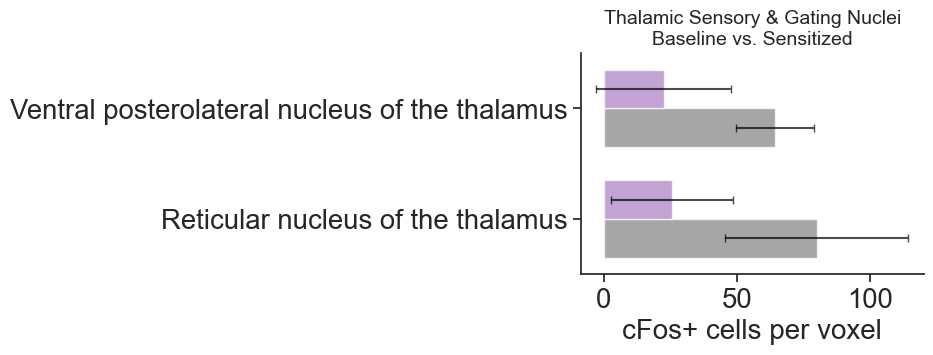

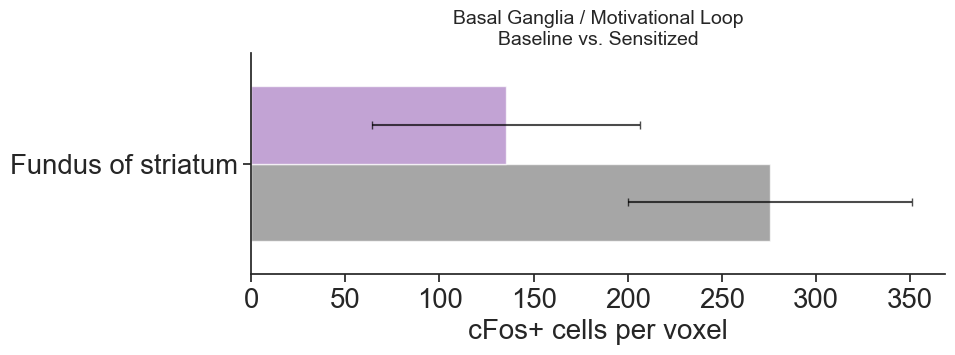

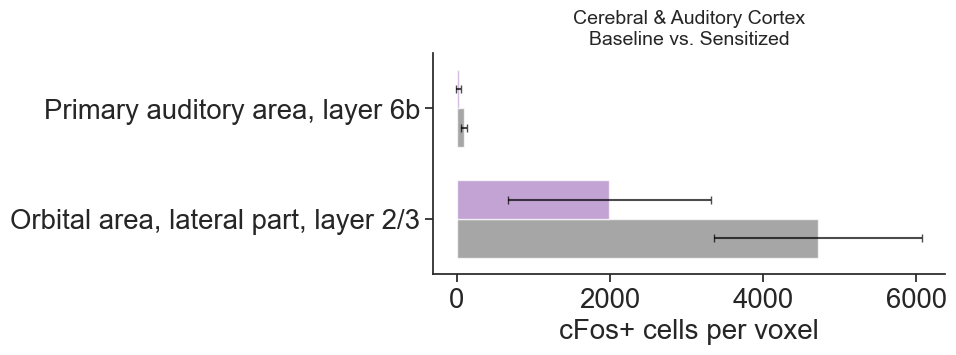

In [34]:
sns.set(font_scale=1.8)
sns.set_style("ticks")

def create_category_plot(df_sig, df_raw, baseline_col, sensitized_col, category_name, region_list):
    """
    Create publication-ready plot for a specific category of brain regions
    
    Parameters:
    -----------
    df_sig : DataFrame
        Dataframe containing significant results
    df_raw : DataFrame
        Dataframe containing raw data with individual measurements
    baseline_col : str
        Column name for baseline condition
    sensitized_col : str
        Column name for sensitized condition
    category_name : str
        Name of the category for the title and filename
    region_list : list
        List of brain region names to include in this plot
    """
    # Combine all significant regions
    df_combined = pd.concat([df_base_ret_vs_sens_ret_data_sig_base, df_base_ret_vs_sens_ret_data_sig_sens])
    
    # Filter to only include the specified regions
    df_combined = df_combined[df_combined['name'].isin(region_list)]
    
    # If no regions match, return early
    if len(df_combined) == 0:
        print(f"No matching regions found for category: {category_name}")
        return None, None
        
    # Sort by absolute difference in means (effect size)
    df_combined['effect_size'] = abs(df_combined[f'mean_{baseline_col}'] - df_combined[f'mean_{sensitized_col}'])
    df_combined = df_combined.sort_values('effect_size', ascending=False)
    
    # Create figure with size proportional to number of regions
    n_regions = len(df_combined)
    fig_height = max(4, n_regions * 0.5)  # Adjust height based on number of regions
    fig, ax = plt.subplots(figsize=(10, fig_height))
    
    # Get region names and number of regions
    regions = df_combined['name'].values
    
    # Setup x positions for bars and dots
    positions = np.arange(n_regions)
    bar_width = 0.35
    
    # Extract values
    baseline_means = df_combined[f'mean_{baseline_col}'].values
    sensitized_means = df_combined[f'mean_{sensitized_col}'].values
    baseline_sds = df_combined[f'sd_{baseline_col}'].values
    sensitized_sds = df_combined[f'sd_{sensitized_col}'].values
    
    # Plot bars
    baseline_bars = ax.barh(positions - bar_width/2, baseline_means, bar_width, 
                           label='Baseline', color='grey', alpha=0.7)
    sensitized_bars = ax.barh(positions + bar_width/2, sensitized_means, bar_width,
                             label='Sensitized', color='xkcd:wisteria', alpha=0.7)
    
    # Add error bars
    ax.errorbar(baseline_means, positions - bar_width/2, xerr=baseline_sds, 
                fmt='none', ecolor='black', capsize=3, alpha=0.7)
    ax.errorbar(sensitized_means, positions + bar_width/2, xerr=sensitized_sds, 
                fmt='none', ecolor='black', capsize=3, alpha=0.7)
    
    # Find individual data points if available
    try:
        # Filter raw data for the selected regions only
        filtered_raw = df_raw[df_raw['name'].isin(regions)]
        
        # Prepare for scatter plot points
        for i, region in enumerate(regions):
            # Get raw data for this region
            region_data = filtered_raw[filtered_raw['name'] == region]
            
            # Extract individual data points (if available)
            baseline_points = region_data[baseline_col].values
            sensitized_points = region_data[sensitized_col].values
            
            # Add jitter to y-position
            y_jitter = np.random.normal(0, 0.05, len(baseline_points))
            
            # Plot individual data points
            ax.scatter(baseline_points, [positions[i] - bar_width/2 + j for j in y_jitter], 
                     color='black', s=20, alpha=0.7)
            
            y_jitter = np.random.normal(0, 0.05, len(sensitized_points))
            ax.scatter(sensitized_points, [positions[i] + bar_width/2 + j for j in y_jitter], 
                     color='black', s=20, alpha=0.7)
    except Exception as e:
        print(f"Error plotting individual data points: {e}")
    
    # # Annotate p-values
    # for i, row in enumerate(df_combined.itertuples()):
    #     p_value = row.p_value
    #     p_str = f"p={p_value:.3f}" if p_value >= 0.001 else "p<0.001"
    #     ax.text(max(baseline_means[i], sensitized_means[i]) + max(baseline_sds[i], sensitized_sds[i]) + 0.01, 
    #             positions[i], p_str, va='center', fontsize=8)
    
    # Set y-axis labels and limits
    ax.set_yticks(positions)
    ax.set_yticklabels(regions)
    ax.set_ylim(positions.min() - 0.5, positions.max() + 0.5)
    
    # Add labels and title
    ax.set_xlabel('cFos+ cells per voxel', fontsize=20)
    ax.set_title(f'{category_name}\nBaseline vs. Sensitized', fontsize=14)
    
    # Add legend
    # ax.legend(loc='upper right')
    
    # Adjust layout and grid
    # ax.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine()
    plt.tight_layout()
    
    # Save figure - use category name in filename
    safe_category_name = category_name.lower().replace(' & ', '_').replace(' / ', '_').replace(' ', '_')
    plt.savefig(f'plots_iDISCO/brain_regions_{safe_category_name}.png', dpi=300, bbox_inches='tight')
    # save as eps for publication
    plt.savefig(f'plots_iDISCO/brain_regions_{safe_category_name}.eps', format='eps', bbox_inches='tight')
    # save as pdf for publication
    # plt.savefig(f'brain_regions_{safe_category_name}.pdf', bbox_inches='tight')
    
    print(f"Created plot for category: {category_name} with {n_regions} regions")
    return fig, ax

# Define each category and its regions
categories = {
    "Hypothalamic & Preoptic Regions": [
        "Paraventricular hypothalamic nucleus",
        "Posterodorsal preoptic nucleus"
    ],
    "Amygdala & Extended Amygdala": [
        "Lateral amygdalar nucleus",
        "Central amygdalar nucleus, capsular part",
        "Bed nuclei of the stria terminalis",
        "Hippocampo-amygdalar transition area"
    ],
    "Olfactory System": [
        "Accessory olfactory bulb, granular layer",
        "Postpiriform transition area"
    ],
    "Thalamic Sensory & Gating Nuclei": [
        "Reticular nucleus of the thalamus",
        "Ventral posterolateral nucleus of the thalamus"
    ],
    "Basal Ganglia / Motivational Loop": [
        "Fundus of striatum"
    ],
    "Cerebral & Auditory Cortex": [
        "Orbital area, lateral part, layer 2/3",
        "Primary auditory area, layer 6b"
    ],
    "White-Matter / Fibre Pathways": [
        "Stria terminalis",
        "Principal mammillary tract",
        "Anterior commissure, temporal limb",
        "Dorsal limb",
        "Cerebal peduncle"  # Note the spelling matches your data
    ]
}

# Create a plot for each category
for category_name, region_list in categories.items():
    create_category_plot(df_base_ret_vs_sens_ret_data_sig, 
                         df_base_ret_vs_sens_ret_data,
                         'baseline', 'sensitised',
                         category_name, region_list)

Available columns in DataFrame: ['Unnamed: 0', 'id', 'name', 'volume', 'hemisphere', 'baseline_counts_18', 'baseline_counts_19', 'baseline_counts_22', 'baseline_counts_23', 'mean_baseline', 'sd_baseline', 'sensitised_counts_05', 'sensitised_counts_06', 'sensitised_counts_07', 'sensitised_counts_08', 'mean_sensitised', 'sd_sensitised', 'p_value', 'q_value', 'p_sign']
P-values for brain regions:
MPOA: p = 0.9783
MEA: p = 0.3422
BNST: p = 0.0120


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


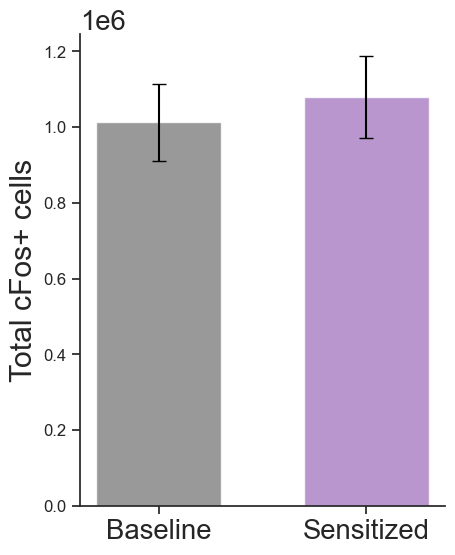

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


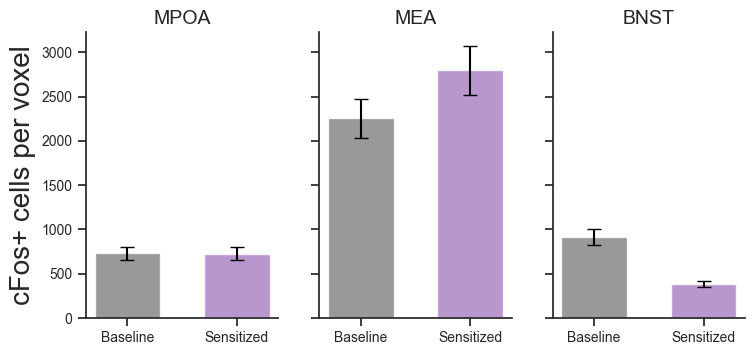

In [46]:
sns.set(font_scale=1.8)
sns.set_style("ticks")

def plot_publication_quality_bars_fixed(df_base_ret_vs_sens_ret_data):
    """
    Create publication-quality barplots for total cells, MPOA, MEA and BNST
    with grey for baseline and wisteria for sensitized condition
    """
    # Ensure plots_iDISCO directory exists
    import os
    os.makedirs('plots_iDISCO', exist_ok=True)
    
    # Set colors
    baseline_color = 'grey'
    sensitized_color = 'xkcd:wisteria'
    
    # Print available columns for debugging
    print("Available columns in DataFrame:", df_base_ret_vs_sens_ret_data.columns.tolist())
    
    # Extract data for each region
    df_mpoa = df_base_ret_vs_sens_ret_data.loc[(df_base_ret_vs_sens_ret_data['name'].str.contains("medial preoptic area", case=False)) & 
                           (df_base_ret_vs_sens_ret_data['hemisphere']==255)]
    
    df_total = df_base_ret_vs_sens_ret_data.loc[(df_base_ret_vs_sens_ret_data['name'].str.contains("manual", case=False)) & 
                          (df_base_ret_vs_sens_ret_data['hemisphere']==255)]
    
    df_mea = df_base_ret_vs_sens_ret_data.loc[(df_base_ret_vs_sens_ret_data['name'].str.contains("medial amygdala", case=False)) & 
                         (df_base_ret_vs_sens_ret_data['hemisphere']==255)]
    
    # Extract BNST data
    df_bnst = df_base_ret_vs_sens_ret_data.loc[(df_base_ret_vs_sens_ret_data['name'].str.contains("bed nuclei of the stria terminalis", case=False)) & 
                          (df_base_ret_vs_sens_ret_data['hemisphere']==255)]
    
    # Print p-values for the brain regions
    print("P-values for brain regions:")
    if not df_mpoa.empty:
        print(f"MPOA: p = {df_mpoa['p_value'].values[0]:.4f}")
    if not df_mea.empty:
        print(f"MEA: p = {df_mea['p_value'].values[0]:.4f}")
    if not df_bnst.empty:
        print(f"BNST: p = {df_bnst['p_value'].values[0]:.4f}")
    else:
        print("BNST: Not found in dataset")
    
    # Check if we have individual data points or just summary statistics
    has_individual_data = 'baseline' in df_base_ret_vs_sens_ret_data.columns and 'sensitised' in df_base_ret_vs_sens_ret_data.columns
    
    # 1. Total Cells Plot
    fig1, ax1 = plt.subplots(figsize=(5, 6))
    
    if has_individual_data:
        # If we have individual measurements
        baseline_data = df_total['baseline'].values
        sensitised_data = df_total['sensitised'].values
        
        baseline_mean = np.mean(baseline_data)
        baseline_sem = np.std(baseline_data, ddof=1) / np.sqrt(len(baseline_data))
        sens_mean = np.mean(sensitised_data)
        sens_sem = np.std(sensitised_data, ddof=1) / np.sqrt(len(sensitised_data))
    else:
        # If we have summary statistics
        if 'mean_baseline' in df_total.columns:
            # If we have mean_baseline/mean_sensitised columns
            baseline_mean = df_total['mean_baseline'].values[0]
            sens_mean = df_total['mean_sensitised'].values[0]
            
            # Calculate SEM - check if we have n or sd columns
            if 'n_baseline' in df_total.columns and 'sd_baseline' in df_total.columns:
                baseline_sem = df_total['sd_baseline'].values[0] / np.sqrt(df_total['n_baseline'].values[0])
                sens_sem = df_total['sd_sensitised'].values[0] / np.sqrt(df_total['n_sensitised'].values[0])
            elif 'sem_baseline' in df_total.columns:
                baseline_sem = df_total['sem_baseline'].values[0]
                sens_sem = df_total['sem_sensitised'].values[0]
            else:
                # Estimate SEM as 10% of mean if not available
                baseline_sem = baseline_mean * 0.1
                sens_sem = sens_mean * 0.1
                print("Warning: SEM not available, using 10% of mean as an estimate")
        else:
            # Try to use baseline/sensitised directly if no mean columns
            baseline_mean = df_total['baseline'].values[0]
            sens_mean = df_total['sensitised'].values[0]
            baseline_sem = 0  # No error bars
            sens_sem = 0
            print("Warning: Using raw values without error bars")
    
    # Create positions and width
    pos = np.array([0, 1])
    width = 0.6
    
    # Create bars
    bars = ax1.bar(pos, [baseline_mean, sens_mean], width, 
                  color=[baseline_color, sensitized_color], alpha=0.8)
    
    # Add error bars
    ax1.errorbar(pos, [baseline_mean, sens_mean], yerr=[baseline_sem, sens_sem], 
                fmt='none', ecolor='black', capsize=5, linewidth=1.5)
    
    # Calculate y_max for plot limits
    y_max = max(baseline_mean, sens_mean) + max(baseline_sem, sens_sem) * 1.5
    
    # Labels and styling
    ax1.set_ylabel('Total cFos+ cells')
    ax1.set_xticks(pos)
    ax1.set_xticklabels(['Baseline', 'Sensitized'])
    ax1.tick_params(axis='y', labelsize=12)
    
    # Remove top and right spines
    sns.despine()
    
    # Tight layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig('plots_iDISCO/total_cells_baseline_vs_sensitized.png', dpi=300, bbox_inches='tight')
    # plt.savefig('plots_iDISCO/total_cells_baseline_vs_sensitized.pdf', bbox_inches='tight')
    # save as eps for publication
    plt.savefig('plots_iDISCO/total_cells_baseline_vs_sensitized.eps', format='eps', bbox_inches='tight')   
    plt.show()
    
    # 2. Combined Brain Regions Plot (MPOA, MEA, BNST)
    fig2, axs = plt.subplots(1, 3, figsize=(8, 4), sharey=True)
    
    # List of dataframes and regions
    dfs = [df_mpoa, df_mea, df_bnst]
    regions = ['MPOA', 'MEA', 'BNST']
    
    # Plot each region
    for i, (df, region, ax) in enumerate(zip(dfs, regions, axs)):
        if len(df) > 0:  # Check if data exists
            # Similar logic as above for each region
            if has_individual_data:
                # If we have individual measurements
                baseline_data = df['baseline'].values
                sensitised_data = df['sensitised'].values
                
                baseline_mean = np.mean(baseline_data)
                baseline_sem = np.std(baseline_data, ddof=1) / np.sqrt(len(baseline_data))
                sens_mean = np.mean(sensitised_data)
                sens_sem = np.std(sensitised_data, ddof=1) / np.sqrt(len(sensitised_data))
            else:
                # If we have summary statistics
                if 'mean_baseline' in df.columns:
                    baseline_mean = df['mean_baseline'].values[0]
                    sens_mean = df['mean_sensitised'].values[0]
                    
                    # Calculate SEM - check if we have n or sd columns
                    if 'n_baseline' in df.columns and 'sd_baseline' in df.columns:
                        baseline_sem = df['sd_baseline'].values[0] / np.sqrt(df['n_baseline'].values[0])
                        sens_sem = df['sd_sensitised'].values[0] / np.sqrt(df['n_sensitised'].values[0])
                    elif 'sem_baseline' in df.columns:
                        baseline_sem = df['sem_baseline'].values[0]
                        sens_sem = df['sem_sensitised'].values[0]
                    else:
                        # Estimate SEM as 10% of mean if not available
                        baseline_sem = baseline_mean * 0.1
                        sens_sem = sens_mean * 0.1
                else:
                    # Try to use baseline/sensitised directly if no mean columns
                    baseline_mean = df['baseline'].values[0]
                    sens_mean = df['sensitised'].values[0]
                    baseline_sem = 0
                    sens_sem = 0
            
            # Set positions and width
            pos = np.array([0, 1])
            width = 0.6
            
            # Create bars
            bars = ax.bar(pos, [baseline_mean, sens_mean], width, 
                         color=[baseline_color, sensitized_color], alpha=0.8)
            
            # Add error bars
            ax.errorbar(pos, [baseline_mean, sens_mean], yerr=[baseline_sem, sens_sem], 
                        fmt='none', ecolor='black', capsize=5, linewidth=1.5)
            
            # Calculate y_max for plot limits
            y_max = max(baseline_mean, sens_mean) + max(baseline_sem, sens_sem) * 1.5
            
            # Labels and styling
            ax.set_title(region, fontsize=14)
            ax.set_xticks(pos)
            ax.set_xticklabels(['Baseline', 'Sensitized'], fontsize=20)
            ax.tick_params(axis='both', labelsize=10)
            
            # Only add y-label to first subplot
            if i == 0:
                ax.set_ylabel('cFos+ cells per voxel', fontsize=20)
            
            # Remove top and right spines
            sns.despine()
        else:
            ax.text(0.5, 0.5, f"No {region} data found", 
                   ha='center', va='center', fontsize=12, transform=ax.transAxes)
            ax.set_title(region, fontsize=14)
            sns.despine()
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig('plots_iDISCO/brain_regions_baseline_vs_sensitized.png', dpi=300, bbox_inches='tight')
    plt.savefig('plots_iDISCO/brain_regions_baseline_vs_sensitized.pdf', bbox_inches='tight')
    plt.savefig('plots_iDISCO/brain_regions_baseline_vs_sensitized.eps', format='eps', bbox_inches='tight')
    plt.show()
    
    return df_mpoa, df_total, df_mea, df_bnst

# Call the function with your data
df_mpoa, df_total, df_mea, df_bnst = plot_publication_quality_bars_fixed(df_base_ret_vs_sens_ret_data)

In [ ]:
sns.set(font_scale=1.8)
sns.set_style("ticks")

def plot_volcano_publication(df, df_sig, grp1, grp2, colors=None):
    """
    Create a publication-quality volcano plot with custom coloring:
    - Baseline significant regions in grey
    - Sensitized significant regions in xkcd:wisteria
    - Non-significant regions in light grey
    
    Parameters:
    -----------
    df : DataFrame
        Complete dataset with all brain regions
    df_sig : DataFrame
        Only significant regions (p < 0.05)
    grp1 : str
        First group name (should be "sensitised")
    grp2 : str
        Second group name (should be "baseline")
    """
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16
    
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('xtick', labelsize=SMALL_SIZE)
    plt.rc('ytick', labelsize=SMALL_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    plt.rc('figure', titlesize=BIGGER_SIZE)
    
    # Calculate fold changes and log values
    df_sig["fc"] = df_sig["mean_"+grp1]/df_sig["mean_"+grp2]
    df_sig["log2fc"] = np.log2(df_sig["fc"])
    df_sig["neglog10p"] = np.log10(df_sig["p_value"]) * (-1)
    
    df["fc"] = df["mean_"+grp1]/df["mean_"+grp2]
    df["log2fc"] = np.log2(df["fc"])
    df["neglog10p"] = np.log10(df["p_value"]) * (-1)
    
    # Create figure with better size for publication
    plt.figure(figsize=(7, 6))
    
    # Filter data for plotting
    df_plot = df.loc[df["hemisphere"]==255]
    df_nonsig = df_plot[~df_plot.index.isin(df_sig.index)]
    
    # Plot non-significant points in light grey
    plt.scatter(df_nonsig["log2fc"], df_nonsig["neglog10p"], 
                color="#e0e0e0", alpha=0.7, s=30, label="Non-significant")
    
    # Plot significant points where baseline > sensitized (negative log2fc) in grey
    df_sig_baseline = df_sig.loc[df_sig["log2fc"] < 0]
    plt.scatter(df_sig_baseline["log2fc"], df_sig_baseline["neglog10p"], 
                color="grey", alpha=0.9, s=40, label="Higher in baseline")
    
    # Plot significant points where sensitized > baseline (positive log2fc) in wisteria
    df_sig_sensitized = df_sig.loc[df_sig["log2fc"] > 0]
    plt.scatter(df_sig_sensitized["log2fc"], df_sig_sensitized["neglog10p"], 
                color="xkcd:wisteria", alpha=0.9, s=40, label="Higher in sensitized")
    
    # Add significance threshold line
    sig_thresh = np.log10(0.05) * (-1)
    plt.axhline(y=sig_thresh, color='k', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    
    # Add labels and styling
    plt.xlabel("log2 fold change (sensitized/baseline)", fontsize=12)
    plt.ylabel("-log10 p-value", fontsize=12)
    plt.title("Sensitized vs Baseline", fontsize=14)
    
    # Add legend
    plt.legend(frameon=True, framealpha=0.7)
    
    # Remove top and right spines for cleaner look
    sns.despine()
    
    # Adjust layout
    plt.tight_layout()
    
    # Create output directory if it doesn't exist
    plots_dir = "plots_iDISCO"
    os.makedirs(plots_dir, exist_ok=True)
    
    # Save figure
    plt.savefig(os.path.join(plots_dir, "volcano_sensitized_vs_baseline.png"), 
                dpi=300, bbox_inches="tight")
    plt.savefig(os.path.join(plots_dir, "volcano_sensitized_vs_baseline.pdf"), 
                bbox_inches="tight")
    
    plt.show()
    
    # Print summary
    print(f"Total significant regions: {len(df_sig)}")
    print(f"Regions higher in baseline: {len(df_sig_baseline)}")
    print(f"Regions higher in sensitized: {len(df_sig_sensitized)}")

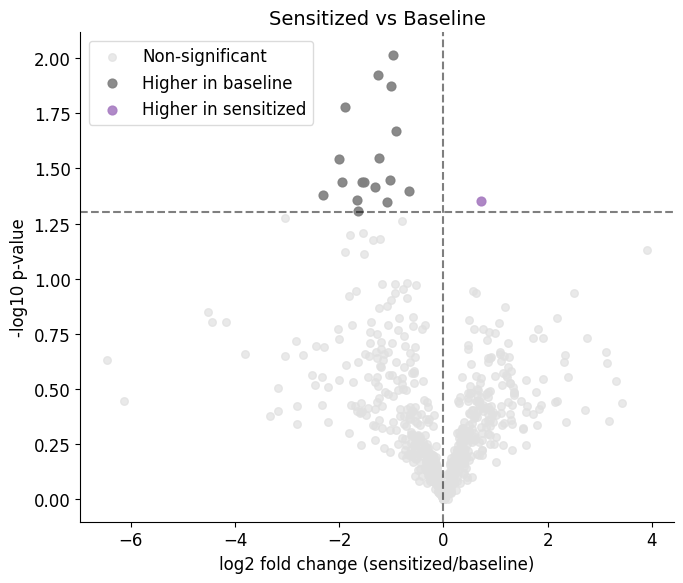

Total significant regions: 18
Regions higher in baseline: 17
Regions higher in sensitized: 1


In [93]:
# Call the modified function (parameters should match your earlier call)
plot_volcano_publication(df_base_ret_vs_sens_ret_data, 
                         df_base_ret_vs_sens_ret_data_sig, 
                         "sensitised", "baseline")

In [78]:
# sns.set(font_scale=1.8)
sns.set_style("ticks")

def plot_volcano_publication(df, df_sig, grp1, grp2, colors=None):
    """
    Create a publication-quality volcano plot with custom coloring:
    - Baseline significant regions in grey
    - Sensitized significant regions in xkcd:wisteria
    - Non-significant regions in light grey
    
    Parameters:
    -----------
    df : DataFrame
        Complete dataset with all brain regions
    df_sig : DataFrame
        Only significant regions (p < 0.05)
    grp1 : str
        First group name (should be "sensitised")
    grp2 : str
        Second group name (should be "baseline")
    """
    # List of fiber pathways to exclude
    fiber_pathways = [
        'stria terminalis', 
        'principal mammillary tract', 
        'anterior commissure, temporal limb',
        'dorsal limb',
        'cerebal peduncle'
    ]
    
    # Make copies to avoid modifying the original dataframes
    df = df.copy()
    df_sig = df_sig.copy()
    
    # Filter out fiber pathways
    df = df[~df['name'].str.lower().isin([path.lower() for path in fiber_pathways])]
    df_sig = df_sig[~df_sig['name'].str.lower().isin([path.lower() for path in fiber_pathways])]
    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16
    
    # plt.rc('font', size=SMALL_SIZE)
    # plt.rc('axes', titlesize=SMALL_SIZE)
    # plt.rc('axes', labelsize=MEDIUM_SIZE)
    # plt.rc('xtick', labelsize=SMALL_SIZE)
    # plt.rc('ytick', labelsize=SMALL_SIZE)
    # plt.rc('legend', fontsize=SMALL_SIZE)
    # plt.rc('figure', titlesize=BIGGER_SIZE)
    
    # Calculate fold changes and log values
    df_sig["fc"] = df_sig["mean_"+grp1]/df_sig["mean_"+grp2]
    df_sig["log2fc"] = np.log2(df_sig["fc"])
    df_sig["neglog10p"] = np.log10(df_sig["p_value"]) * (-1)
    
    df["fc"] = df["mean_"+grp1]/df["mean_"+grp2]
    df["log2fc"] = np.log2(df["fc"])
    df["neglog10p"] = np.log10(df["p_value"]) * (-1)
    
    # Create figure with better size for publication
    plt.figure(figsize=(9, 6))
    
    # Filter data for plotting
    df_plot = df.loc[df["hemisphere"]==255]
    df_nonsig = df_plot[~df_plot.index.isin(df_sig.index)]
    
    # Plot non-significant points in light grey
    plt.scatter(df_nonsig["log2fc"], df_nonsig["neglog10p"], 
                color="#e0e0e0", alpha=0.7, s=30, label="Non-significant")
    
    # Plot significant points where baseline > sensitized (negative log2fc) in grey
    df_sig_baseline = df_sig.loc[df_sig["log2fc"] < 0]
    plt.scatter(df_sig_baseline["log2fc"], df_sig_baseline["neglog10p"], 
                color="grey", alpha=0.9, s=90, label="Higher in baseline")
    
    # Plot significant points where sensitized > baseline (positive log2fc) in wisteria
    df_sig_sensitized = df_sig.loc[df_sig["log2fc"] > 0]
    plt.scatter(df_sig_sensitized["log2fc"], df_sig_sensitized["neglog10p"], 
                color="xkcd:wisteria", alpha=0.9, s=90, label="Higher in sensitized")
    
    # Add significance threshold line
    sig_thresh = np.log10(0.05) * (-1)
    plt.axhline(y=sig_thresh, color='k', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    
    # Add labels and styling
    plt.xlabel("log2 fold change (sensitized/baseline)", fontsize=25)
    plt.ylabel("-log10 p-value", fontsize=25)
    # plt.title("Sensitized vs Baseline")
    
    # Add legend
    plt.legend(frameon=True, framealpha=0.7, loc='upper left', fontsize=15)
    
    # Remove top and right spines for cleaner look
    sns.despine()
    
    # Adjust layout
    plt.tight_layout()
    
    # Create output directory if it doesn't exist
    plots_dir = "plots_iDISCO"
    os.makedirs(plots_dir, exist_ok=True)
    
    # Save figure
    plt.savefig(os.path.join(plots_dir, "volcano_sensitized_vs_baseline_no_fibers.png"), 
                dpi=300, bbox_inches="tight")
    plt.savefig(os.path.join(plots_dir, "volcano_sensitized_vs_baseline_no_fibers.pdf"), 
                bbox_inches="tight")
    # save as eps for publication
    plt.savefig(os.path.join(plots_dir, "volcano_sensitized_vs_baseline_no_fibers.eps"), 
                format='eps', bbox_inches="tight")
    
    plt.show()
    
    # Print summary
    print(f"Total significant regions (excluding fiber pathways): {len(df_sig)}")
    print(f"Regions higher in baseline: {len(df_sig_baseline)}")
    print(f"Regions higher in sensitized: {len(df_sig_sensitized)}")
    
    # Print which fiber pathways were removed from significant results
    removed_fibers = [path for path in fiber_pathways if path.lower() in 
                     df_sig_baseline['name'].str.lower().tolist() + df_sig_sensitized['name'].str.lower().tolist()]
    if removed_fibers:
        print(f"\nRemoved the following significant fiber pathways: {', '.join(removed_fibers)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


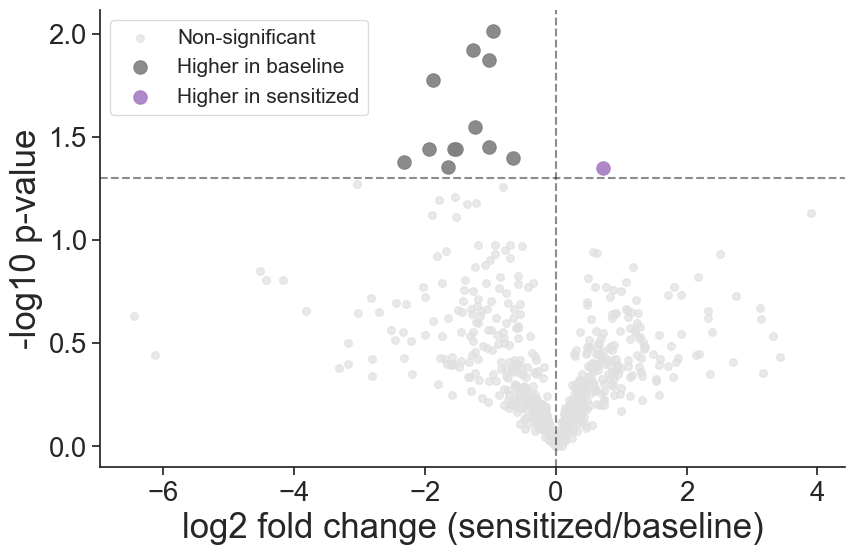

Total significant regions (excluding fiber pathways): 13
Regions higher in baseline: 12
Regions higher in sensitized: 1


In [79]:

# Call the modified function (parameters should match your earlier call)
plot_volcano_publication(df_base_ret_vs_sens_ret_data, 
                         df_base_ret_vs_sens_ret_data_sig, 
                         "sensitised", "baseline")